# Strategie ewolucyjne

Notebook pokazuje podstawowe mechanizmy strategii ewolucyjnych.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

%matplotlib inline

## Przykładowe problemy testowe

In [2]:
# Sphere function (minimum at 0)
def objective_function_F1(X):
    return - np.sum(X**2, axis=1)

# Sphere function - modified
def objective_function_F1a(X):
    return - (X[:, 0]**2 + 9*X[:, 1]**2)

# Sphere function - modified
def objective_function_F1b(X):
    return - (X[:, 0]**2 + 625*X[:, 1]**2)

# Sphere function - modified
def objective_function_F1c(X):
    return - (X[:, 0]**2 + 2*X[:, 1]**2 - 2 * X[:, 0] * X[:, 1])

In [3]:
# Rastrigin function (minimum at 0)
def objective_function_F6(X):
    return - 10.0 * X.shape[1] - np.sum(X**2, axis=1) + 10.0 * np.sum(np.cos(2 * np.pi * X), axis=1)

In [4]:
# Schwefel function (minimum at 420.9687)
# (REMARK: should be considered only on [-500, 500]^d, because there are better minima outside)
def objective_function_F7(X):
    return - 418.9829 * X.shape[1] + np.sum(X * np.sin(np.sqrt(np.abs(X))), axis=1)

In [5]:
# Griewank function (minimum at 0)
def objective_function_F8(X):
    return - 1 - np.sum(X**2 / 4000, axis=1) + np.prod(np.cos(X / np.sqrt(np.linspace(1, X.shape[1], X.shape[1]))), axis=1)

In [6]:
def plot_3D_benchmark_function(objective_function, domain_X, domain_Y, title):
    plt.figure(figsize=(12, 8))
    ax = plt.gca(projection='3d')
    X, Y = np.meshgrid(domain_X, domain_Y)
    Z = - objective_function(np.vstack([X.ravel(), Y.ravel()]).T).reshape(X.shape[0], X.shape[1])
    surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.hot, linewidth=0, antialiased=True)
    plt.title(title)
    plt.show()

In [7]:
def plot_contour_benchmark_function(objective_function, domain_X, domain_Y, title):
    plt.figure(figsize=(9, 9))
    X, Y = np.meshgrid(domain_X, domain_Y)
    Z = - objective_function(np.vstack([X.ravel(), Y.ravel()]).T).reshape(X.shape[0], X.shape[1])
    plt.contour(X, Y, Z, 50)
    plt.title(title)
    plt.show()

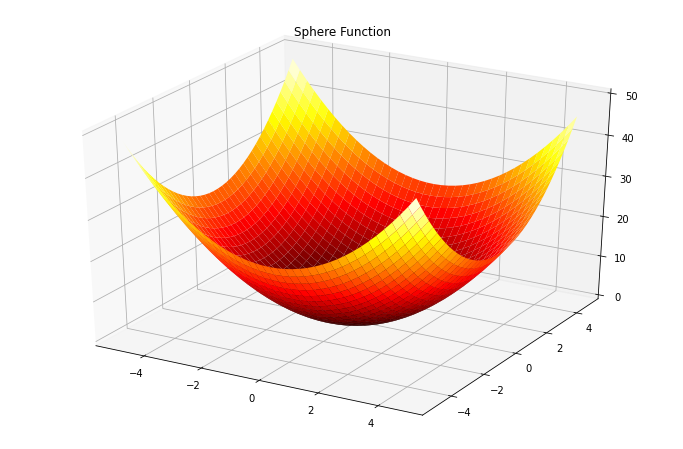

In [8]:
plot_3D_benchmark_function(objective_function_F1, np.arange(-5, 5, 0.25), np.arange(-5, 5, 0.25), 'Sphere Function')

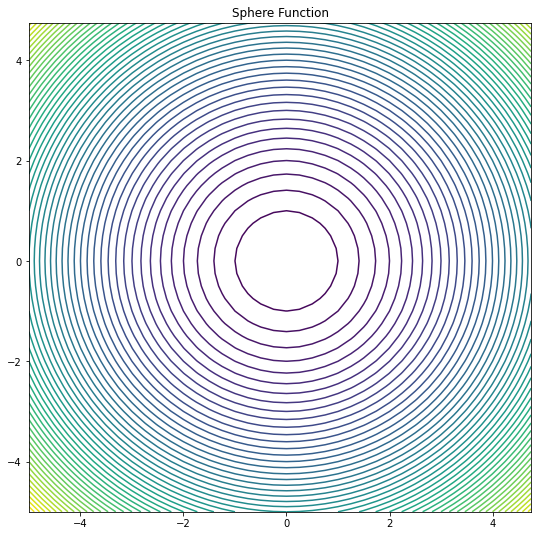

In [9]:
plot_contour_benchmark_function(objective_function_F1, np.arange(-5, 5, 0.25), np.arange(-5, 5, 0.25), 'Sphere Function')

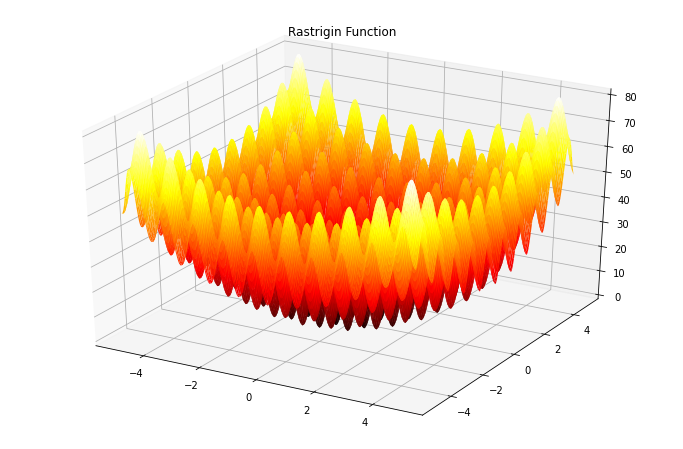

In [10]:
plot_3D_benchmark_function(objective_function_F6, np.arange(-5, 5, 0.05), np.arange(-5, 5, 0.05), 'Rastrigin Function')

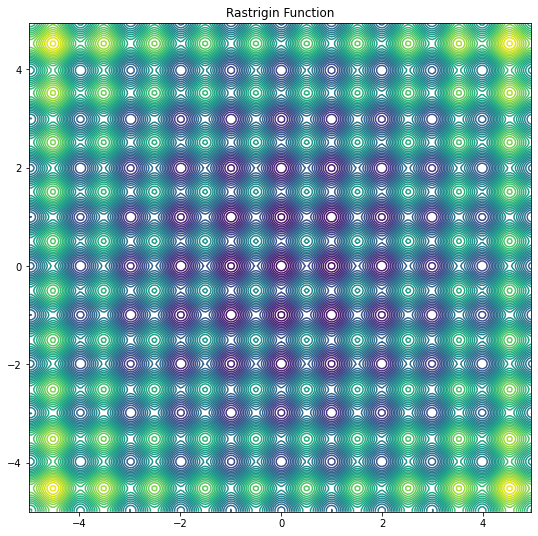

In [11]:
plot_contour_benchmark_function(objective_function_F6, np.arange(-5, 5, 0.05), np.arange(-5, 5, 0.05), 'Rastrigin Function')

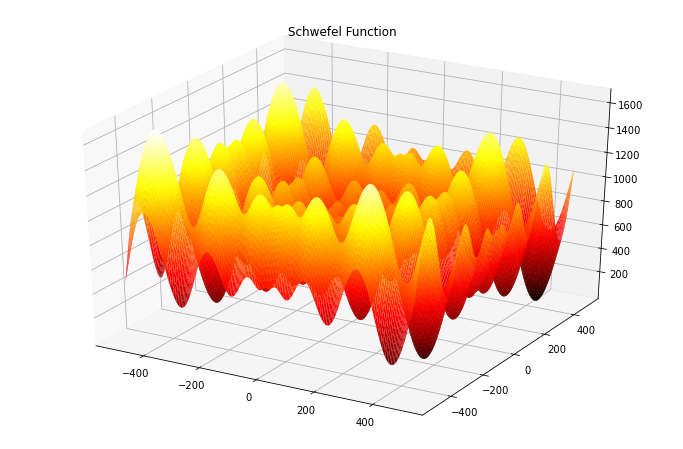

In [12]:
plot_3D_benchmark_function(objective_function_F7, np.arange(-500, 500, 5), np.arange(-500, 500, 5), 'Schwefel Function')

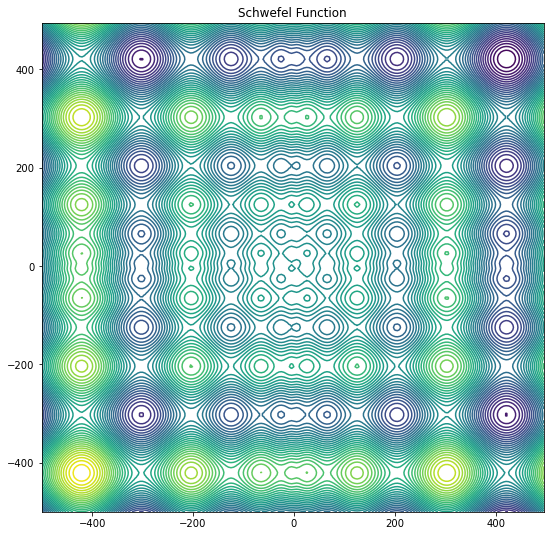

In [13]:
plot_contour_benchmark_function(objective_function_F7, np.arange(-500, 500, 5), np.arange(-500, 500, 5), 'Schwefel Function')

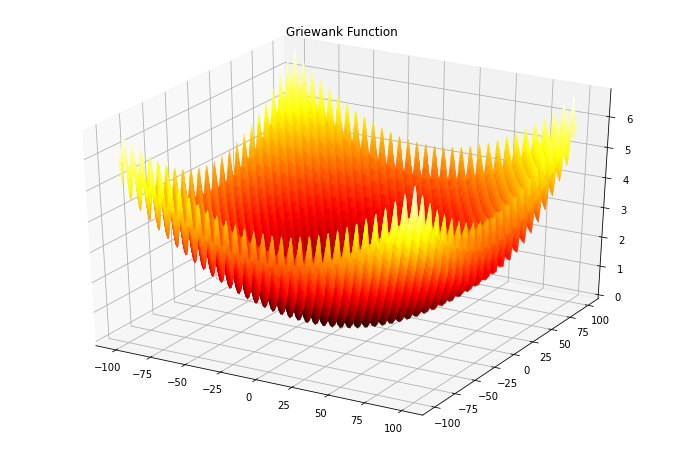

In [14]:
plot_3D_benchmark_function(objective_function_F8, np.arange(-100, 100, 0.5), np.arange(-100, 100, 0.5), 'Griewank Function')

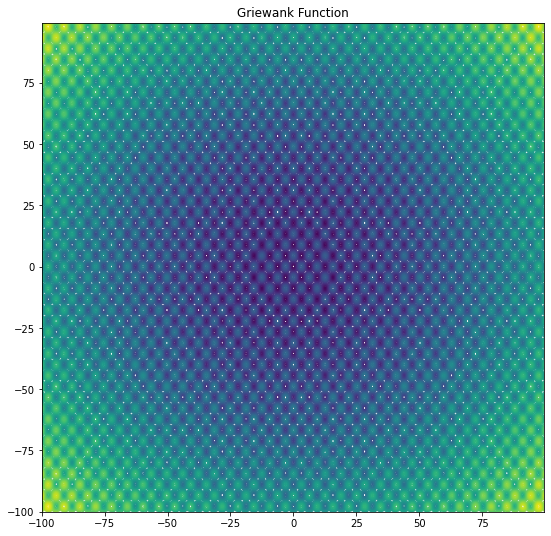

In [15]:
plot_contour_benchmark_function(objective_function_F8, np.arange(-100, 100, 0.5), np.arange(-100, 100, 0.5), 'Griewank Function')

## Przykładowe modele mutacji

In [16]:
N = 250
d = 2

objective_function = objective_function_F1a

original_individual = np.array([[1, 1]])

### Przykład 1:

$x_i = x_i + \varepsilon_i$, gdzie $\varepsilon_i$ ma rozkład normalny $\mathcal{N}(0, \sigma^2)$, zaś $\sigma$ jest taka sama dla wszystkich $i = 1, 2, \ldots, d$

In [17]:
sigma = 0.25
mutations = original_individual + sigma * np.random.randn(N, d)

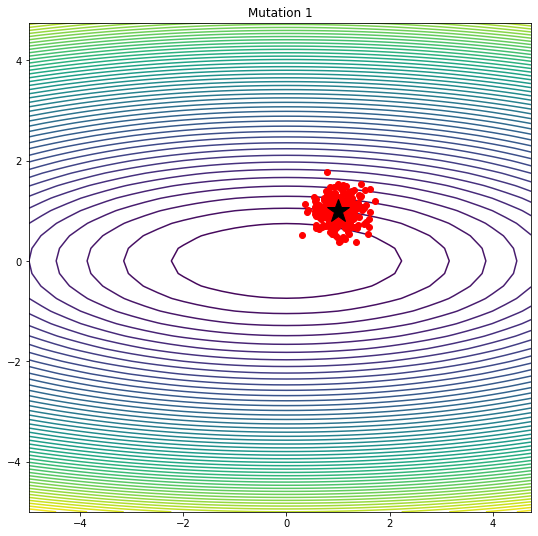

In [18]:
domain_X = np.arange(-5, 5, 0.25)
domain_Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(domain_X, domain_Y)
Z = - objective_function(np.vstack([X.ravel(), Y.ravel()]).T).reshape(X.shape[0], X.shape[1])

plt.figure(figsize=(9, 9))
plt.contour(X, Y, Z, 50)
plt.plot(mutations[:, 0], mutations[:, 1], 'ro')
plt.plot(original_individual[0, 0], original_individual[0, 1], 'k*', markersize=24)
plt.title('Mutation 1')
plt.show()

### Przykład 2:

$x_i = x_i + \varepsilon_i$, gdzie $\varepsilon_i$ ma rozkład normalny $\mathcal{N}(0, \sigma_i^2)$, zaś $\sigma_i$ może być różna dla różnych $i = 1, 2, \ldots, d$

In [19]:
sigma = np.array([0.25, 0.5])
mutations = original_individual + sigma * np.random.randn(N, d)

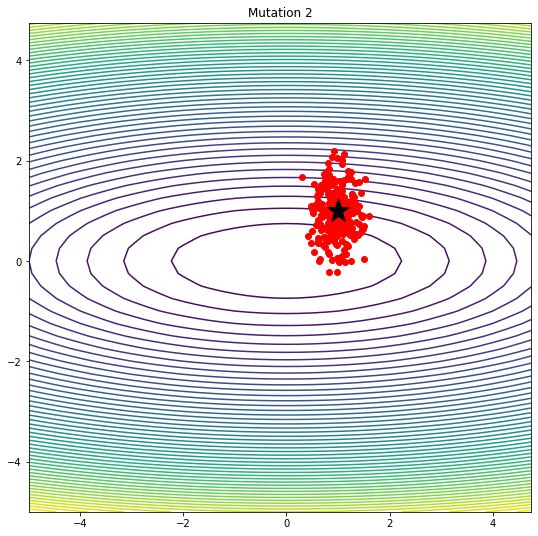

In [20]:
domain_X = np.arange(-5, 5, 0.25)
domain_Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(domain_X, domain_Y)
Z = - objective_function(np.vstack([X.ravel(), Y.ravel()]).T).reshape(X.shape[0], X.shape[1])

plt.figure(figsize=(9, 9))
plt.contour(X, Y, Z, 50)
plt.plot(mutations[:, 0], mutations[:, 1], 'ro')
plt.plot(original_individual[0, 0], original_individual[0, 1], 'k*', markersize=24)
plt.title('Mutation 2')
plt.show()

### Przykład 3:

$\mathbf{x} = \mathbf{x} + \boldsymbol{\varepsilon}$, gdzie $\boldsymbol{\varepsilon}$ ma wielowymiarowy rozkład normalny $\mathcal{N}(\mathbf{0}, \boldsymbol{\Sigma})$

In [21]:
S = np.array([[0.25, 0.25],[0.25, 0.5]])
mutations = original_individual + np.dot(np.random.randn(N, d), np.linalg.cholesky(S).T)

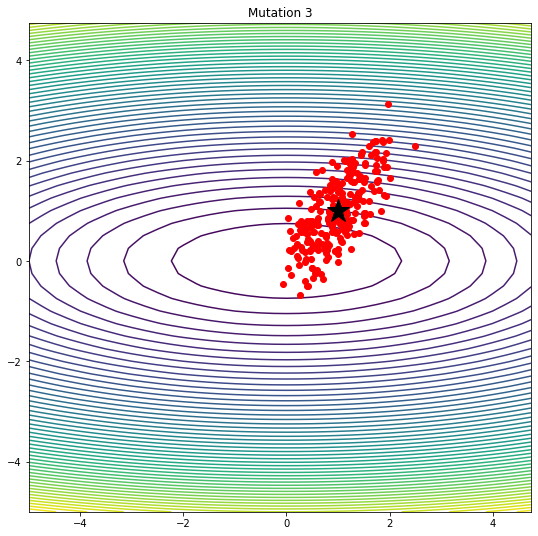

In [22]:
domain_X = np.arange(-5, 5, 0.25)
domain_Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(domain_X, domain_Y)
Z = - objective_function(np.vstack([X.ravel(), Y.ravel()]).T).reshape(X.shape[0], X.shape[1])

plt.figure(figsize=(9, 9))
plt.contour(X, Y, Z, 50)
plt.plot(mutations[:, 0], mutations[:, 1], 'ro')
plt.plot(original_individual[0, 0], original_individual[0, 1], 'k*', markersize=24)
plt.title('Mutation 3')
plt.show()

## Przykładowa strategia ewolucyjna

In [95]:
def es(objective_function, chromosome_length, population_size, number_of_iterations, number_of_offspring, number_of_parents, sigma, tau, tau_0, log_frequency=1, check_range=False, domain = (0,0)):

    best_solution = np.empty((1, chromosome_length))
    best_solution_objective_value = 0.00

    log_objective_values = np.empty((number_of_iterations, 4))
    log_best_solutions = np.empty((number_of_iterations, chromosome_length))
    log_best_sigmas = np.empty((number_of_iterations, chromosome_length))

    # generating an initial population
    current_population_solutions = 100.0 * np.random.rand(population_size, chromosome_length)
    current_population_sigmas = sigma * np.ones((population_size, chromosome_length))

    # evaluating the objective function on the current population
    current_population_objective_values = objective_function(current_population_solutions)

    for t in range(number_of_iterations):

        # selecting the parent indices by the roulette wheel method
        fitness_values = current_population_objective_values - current_population_objective_values.min()
        if fitness_values.sum() > 0:
            fitness_values = fitness_values / fitness_values.sum()
        else:
            fitness_values = 1.0 / population_size * np.ones(population_size)
        parent_indices = np.random.choice(population_size, (number_of_offspring, number_of_parents), True, fitness_values).astype(np.int64)

        # creating the children population by Global Intermediere Recombination
        children_population_solutions = np.zeros((number_of_offspring, chromosome_length))
        children_population_sigmas = np.zeros((number_of_offspring, chromosome_length))
        for i in range(number_of_offspring):
            children_population_solutions[i, :] = current_population_solutions[parent_indices[i, :], :].mean(axis=0)
            children_population_sigmas[i, :] = current_population_sigmas[parent_indices[i, :], :].mean(axis=0)

        # mutating the children population by adding random gaussian noise
        children_population_sigmas = children_population_sigmas * np.exp(tau * np.random.randn(number_of_offspring, chromosome_length) + tau_0 * np.random.randn(number_of_offspring, 1))
        children_population_solutions = children_population_solutions + children_population_sigmas * np.random.randn(number_of_offspring, chromosome_length)
        if check_range:
            children_population_solutions[children_population_solutions < domain[0]] = domain[0]
            children_population_solutions[children_population_solutions > domain[1]] = domain[1]
        
        
        # evaluating the objective function on the children population
        children_population_objective_values = objective_function(children_population_solutions)

        # replacing the current population by (Mu + Lambda) Replacement
        current_population_objective_values = np.hstack([current_population_objective_values, children_population_objective_values])
        current_population_solutions = np.vstack([current_population_solutions, children_population_solutions])
        current_population_sigmas = np.vstack([current_population_sigmas, children_population_sigmas])

        I = np.argsort(current_population_objective_values)[::-1]
        current_population_solutions = current_population_solutions[I[:population_size], :]
        current_population_sigmas = current_population_sigmas[I[:population_size], :]
        current_population_objective_values = current_population_objective_values[I[:population_size]]

        # recording some statistics
        if best_solution_objective_value < current_population_objective_values[0]:
            best_solution = current_population_solutions[0, :]
            best_solution_objective_value = current_population_objective_values[0]
        log_objective_values[t, :] = [current_population_objective_values.min(), current_population_objective_values.max(), current_population_objective_values.mean(), current_population_objective_values.std()]
        log_best_solutions[t, :] = current_population_solutions[0, :]
        log_best_sigmas[t, :] = current_population_sigmas[0, :]

        if np.mod(t, log_frequency) == 0:
            print("Iteration %04d : best score = %0.8f, mean score = %0.8f." % (t, log_objective_values[:t+1, 1].max(), log_objective_values[t, 2]))

    return best_solution_objective_value, best_solution, log_objective_values, log_best_solutions, log_best_sigmas

### Działanie strategii ewolucyjnej dla funkcji sferycznej F1

Iteration 0000 : best score = -6175.66584067, mean score = -26478.04052069.
Iteration 0010 : best score = -29.20371904, mean score = -239.68581294.
Iteration 0020 : best score = -0.14928821, mean score = -0.74874289.
Iteration 0030 : best score = -0.00027360, mean score = -0.00184295.
Iteration 0040 : best score = -0.00000067, mean score = -0.00000437.
Iteration 0050 : best score = -0.00000000, mean score = -0.00000001.
Iteration 0060 : best score = -0.00000000, mean score = -0.00000000.
Iteration 0070 : best score = -0.00000000, mean score = -0.00000000.
Iteration 0080 : best score = -0.00000000, mean score = -0.00000000.
Iteration 0090 : best score = -0.00000000, mean score = -0.00000000.


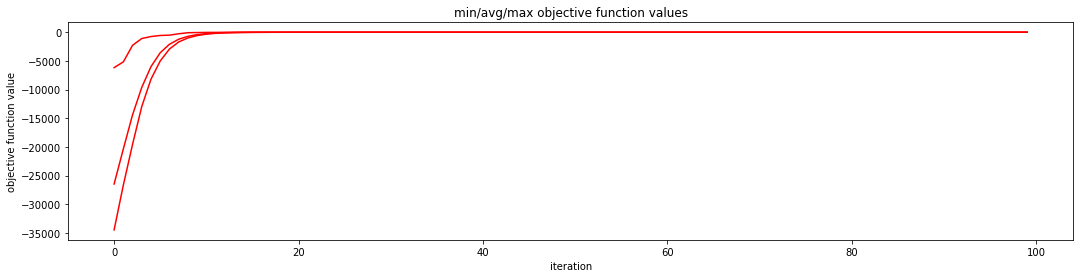

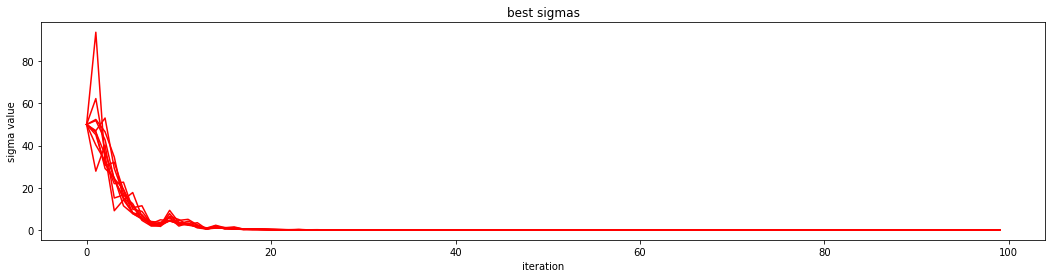

In [39]:
d = 10
N = 2000
T = 100

best_objective_value, best_chromosome, history_objective_values, history_best_chromosome, history_best_sigmas = es(
    objective_function_F1, d, N, T, 2*N, 2, 50.0, 1/np.sqrt(2*d), 1/np.sqrt(2*np.sqrt(d)), 10)

plt.figure(figsize=(18, 4))
plt.plot(history_objective_values[:, 0], 'r-')
plt.plot(history_objective_values[:, 1], 'r-')
plt.plot(history_objective_values[:, 2], 'r-')
plt.xlabel('iteration')
plt.ylabel('objective function value')
plt.title('min/avg/max objective function values')
plt.show()

plt.figure(figsize=(18, 4))
plt.plot(history_best_sigmas, 'r-')
plt.xlabel('iteration')
plt.ylabel('sigma value')
plt.title('best sigmas')
plt.show()

Iteration 0000 : best score = -20037.38722880, mean score = -59136.61206498.
Iteration 0010 : best score = -969.84582265, mean score = -2407.47442253.
Iteration 0020 : best score = -23.95001605, mean score = -61.78823000.
Iteration 0030 : best score = -0.63034361, mean score = -1.64349142.
Iteration 0040 : best score = -0.01448594, mean score = -0.04438518.
Iteration 0050 : best score = -0.00069141, mean score = -0.00142082.
Iteration 0060 : best score = -0.00001920, mean score = -0.00004315.
Iteration 0070 : best score = -0.00000045, mean score = -0.00000116.
Iteration 0080 : best score = -0.00000001, mean score = -0.00000003.
Iteration 0090 : best score = -0.00000000, mean score = -0.00000000.


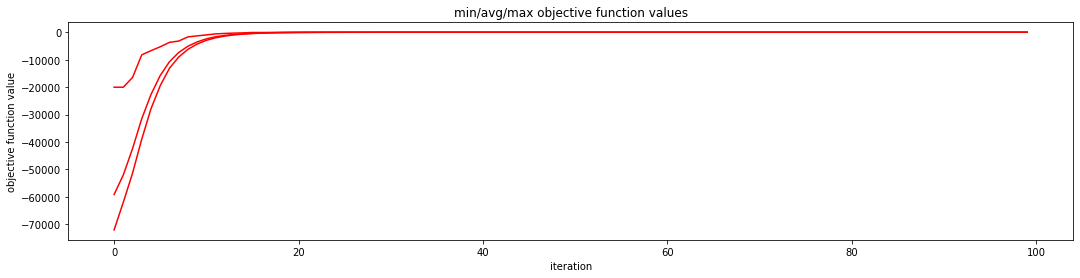

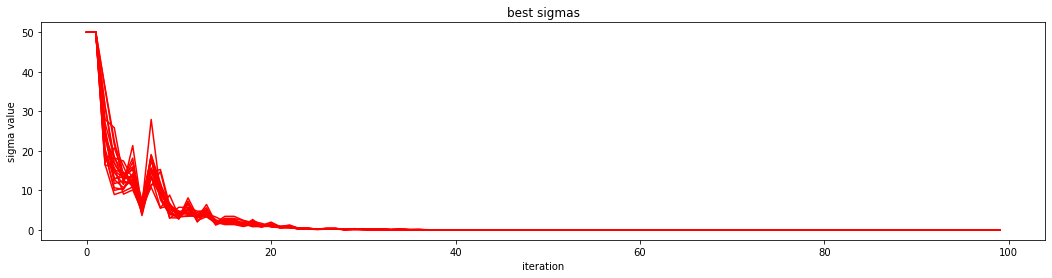

In [40]:
d = 20
N = 2000
T = 100

best_objective_value, best_chromosome, history_objective_values, history_best_chromosome, history_best_sigmas = es(
    objective_function_F1, d, N, T, 2*N, 2, 50.0, 1/np.sqrt(2*d), 1/np.sqrt(2*np.sqrt(d)), 10)

plt.figure(figsize=(18, 4))
plt.plot(history_objective_values[:, 0], 'r-')
plt.plot(history_objective_values[:, 1], 'r-')
plt.plot(history_objective_values[:, 2], 'r-')
plt.xlabel('iteration')
plt.ylabel('objective function value')
plt.title('min/avg/max objective function values')
plt.show()

plt.figure(figsize=(18, 4))
plt.plot(history_best_sigmas, 'r-')
plt.xlabel('iteration')
plt.ylabel('sigma value')
plt.title('best sigmas')
plt.show()

Iteration 0000 : best score = -98787.79827940, mean score = -161165.04169468.
Iteration 0010 : best score = -17659.91481883, mean score = -27653.21804934.
Iteration 0020 : best score = -3051.96685079, mean score = -4665.99953082.
Iteration 0030 : best score = -725.29968537, mean score = -1016.85913052.
Iteration 0040 : best score = -168.64476388, mean score = -235.05216418.
Iteration 0050 : best score = -42.70048209, mean score = -57.03378193.
Iteration 0060 : best score = -10.69925373, mean score = -14.54905953.
Iteration 0070 : best score = -2.34129552, mean score = -3.45447798.
Iteration 0080 : best score = -0.61416588, mean score = -0.85746717.
Iteration 0090 : best score = -0.15193662, mean score = -0.20338236.


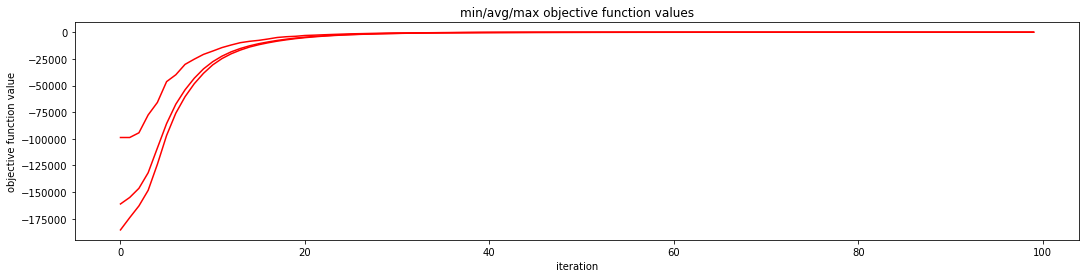

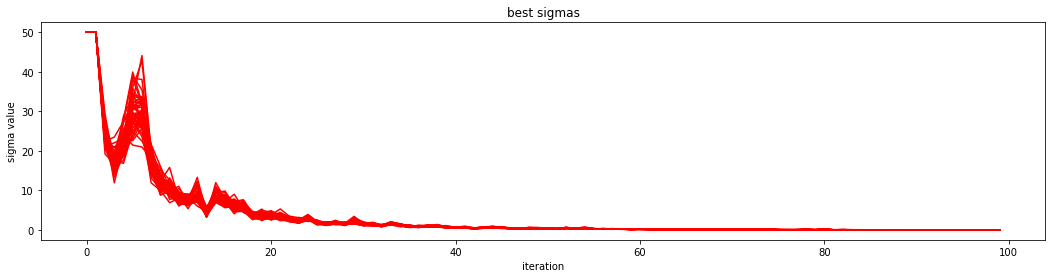

In [41]:
d = 50
N = 2000
T = 100

best_objective_value, best_chromosome, history_objective_values, history_best_chromosome, history_best_sigmas = es(
    objective_function_F1, d, N, T, 2*N, 2, 50.0, 1/np.sqrt(2*d), 1/np.sqrt(2*np.sqrt(d)), 10)

plt.figure(figsize=(18, 4))
plt.plot(history_objective_values[:, 0], 'r-')
plt.plot(history_objective_values[:, 1], 'r-')
plt.plot(history_objective_values[:, 2], 'r-')
plt.xlabel('iteration')
plt.ylabel('objective function value')
plt.title('min/avg/max objective function values')
plt.show()

plt.figure(figsize=(18, 4))
plt.plot(history_best_sigmas, 'r-')
plt.xlabel('iteration')
plt.ylabel('sigma value')
plt.title('best sigmas')
plt.show()

Iteration 0000 : best score = -246346.29567229, mean score = -330018.35131991.
Iteration 0010 : best score = -103552.31294831, mean score = -134433.68056718.
Iteration 0020 : best score = -40587.42771510, mean score = -49900.60313090.
Iteration 0030 : best score = -19768.50773136, mean score = -22596.92911579.
Iteration 0040 : best score = -8921.75669886, mean score = -10663.17157854.
Iteration 0050 : best score = -4453.96038838, mean score = -5196.69239480.
Iteration 0060 : best score = -2148.87968191, mean score = -2518.17280874.
Iteration 0070 : best score = -1017.15262816, mean score = -1187.99456730.
Iteration 0080 : best score = -479.55816783, mean score = -576.76199827.
Iteration 0090 : best score = -236.58847031, mean score = -276.39797730.
Iteration 0100 : best score = -110.94861053, mean score = -133.72092340.
Iteration 0110 : best score = -55.70037378, mean score = -64.98638861.
Iteration 0120 : best score = -28.48736297, mean score = -33.22531567.
Iteration 0130 : best scor

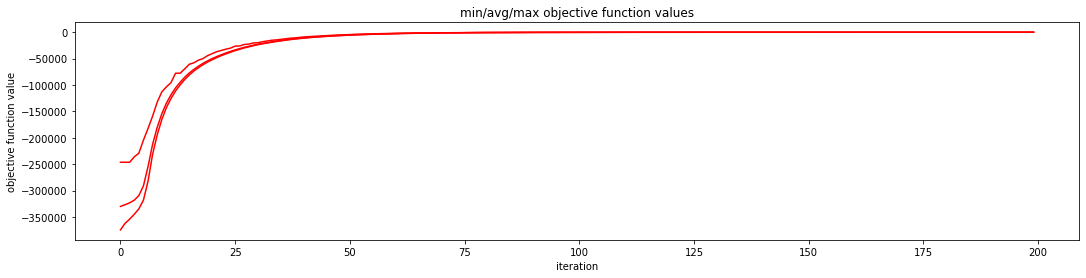

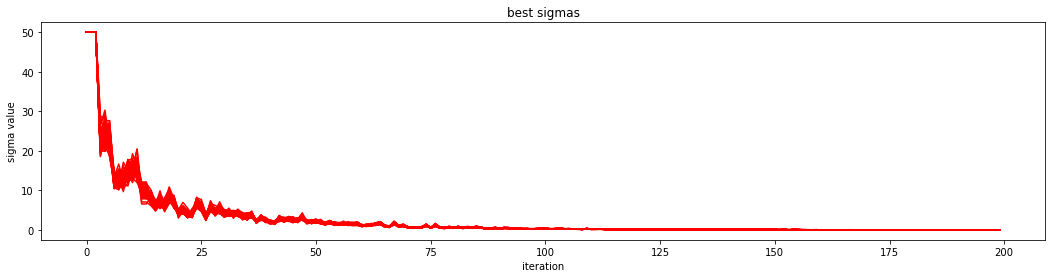

In [57]:
d = 100
N = 2000
T = 200

best_objective_value, best_chromosome, history_objective_values, history_best_chromosome, history_best_sigmas = es(
    objective_function_F1, d, N, T, 2*N, 2, 50.0, 1/np.sqrt(2*d), 1/np.sqrt(2*np.sqrt(d)), 10)

plt.figure(figsize=(18, 4))
plt.plot(history_objective_values[:, 0], 'r-')
plt.plot(history_objective_values[:, 1], 'r-')
plt.plot(history_objective_values[:, 2], 'r-')
plt.xlabel('iteration')
plt.ylabel('objective function value')
plt.title('min/avg/max objective function values')
plt.show()

plt.figure(figsize=(18, 4))
plt.plot(history_best_sigmas, 'r-')
plt.xlabel('iteration')
plt.ylabel('sigma value')
plt.title('best sigmas')
plt.show()

Iteration 0000 : best score = -239998.04937668, mean score = -328766.72708775.
Iteration 0010 : best score = -91626.60930351, mean score = -115536.54234214.
Iteration 0020 : best score = -39999.07904819, mean score = -47854.75505132.
Iteration 0030 : best score = -20784.66727538, mean score = -24436.15696189.
Iteration 0040 : best score = -11390.07124936, mean score = -13043.88877780.
Iteration 0050 : best score = -6358.35864355, mean score = -7207.89576920.
Iteration 0060 : best score = -3455.35599390, mean score = -3945.11419423.
Iteration 0070 : best score = -1865.33248665, mean score = -2162.90599658.
Iteration 0080 : best score = -1039.72141680, mean score = -1186.78092687.
Iteration 0090 : best score = -575.75185114, mean score = -651.51020693.
Iteration 0100 : best score = -310.16412420, mean score = -356.94545310.
Iteration 0110 : best score = -165.79635540, mean score = -192.80877978.
Iteration 0120 : best score = -91.72059368, mean score = -104.94223737.
Iteration 0130 : best

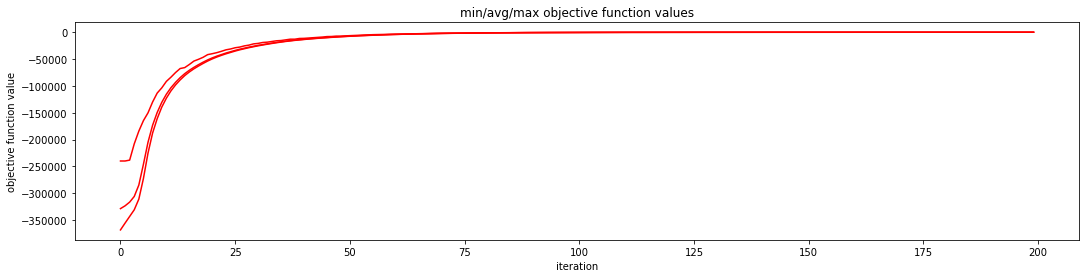

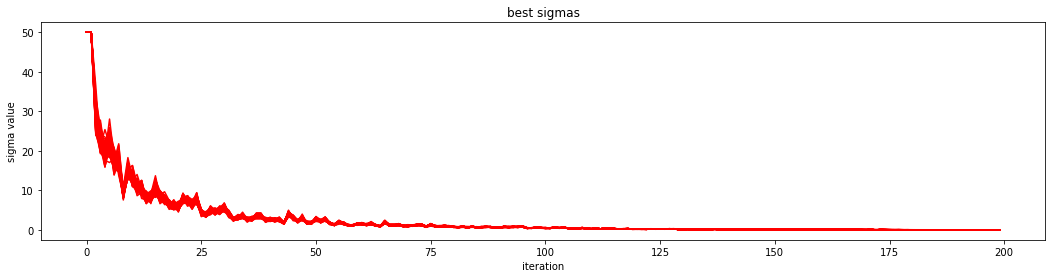

In [58]:
# 4 rodzicow i wieksza populacja
d = 100
N = 3000
T = 200

best_objective_value, best_chromosome, history_objective_values, history_best_chromosome, history_best_sigmas = es(
    objective_function_F1, d, N, T, 2*N, 4, 50.0, 1/np.sqrt(2*d), 1/np.sqrt(2*np.sqrt(d)), 10)

plt.figure(figsize=(18, 4))
plt.plot(history_objective_values[:, 0], 'r-')
plt.plot(history_objective_values[:, 1], 'r-')
plt.plot(history_objective_values[:, 2], 'r-')
plt.xlabel('iteration')
plt.ylabel('objective function value')
plt.title('min/avg/max objective function values')
plt.show()

plt.figure(figsize=(18, 4))
plt.plot(history_best_sigmas, 'r-')
plt.xlabel('iteration')
plt.ylabel('sigma value')
plt.title('best sigmas')
plt.show()

Iteration 0000 : best score = -236522.80270313, mean score = -331983.30542980.
Iteration 0010 : best score = -236522.80270313, mean score = -328541.82742488.
Iteration 0020 : best score = -148616.24236201, mean score = -227455.55407421.
Iteration 0030 : best score = -49470.90866363, mean score = -60174.17027379.
Iteration 0040 : best score = -22524.91226464, mean score = -26744.10765736.
Iteration 0050 : best score = -10130.07463454, mean score = -12186.43955921.
Iteration 0060 : best score = -4705.28978994, mean score = -5803.80386785.
Iteration 0070 : best score = -2325.83518914, mean score = -2781.32010425.
Iteration 0080 : best score = -1174.61906545, mean score = -1377.64105208.
Iteration 0090 : best score = -568.13226138, mean score = -675.72828254.
Iteration 0100 : best score = -281.25359061, mean score = -332.09161981.
Iteration 0110 : best score = -142.40705330, mean score = -165.67540872.
Iteration 0120 : best score = -68.42096913, mean score = -81.92530310.
Iteration 0130 : 

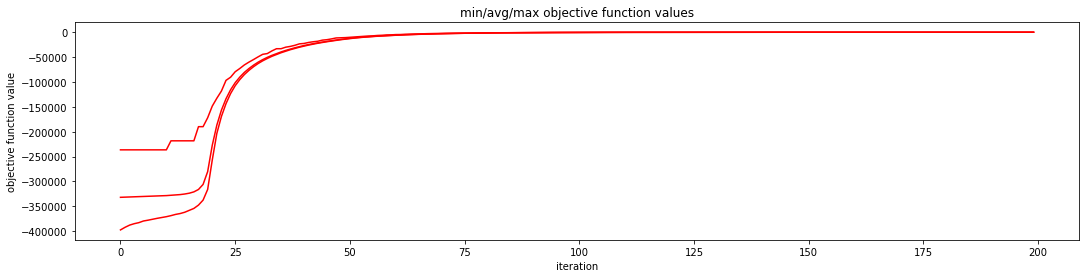

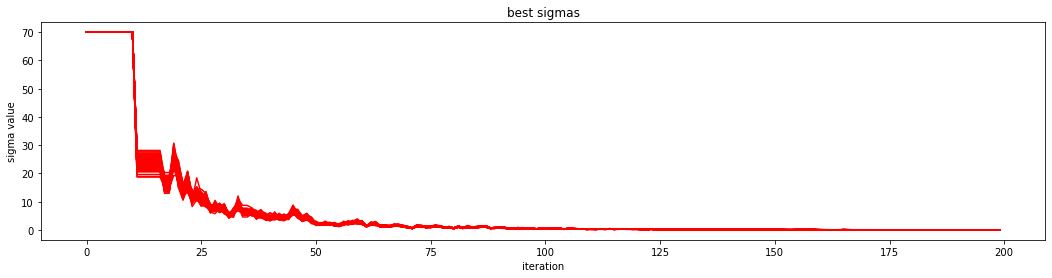

In [59]:
# wieksza populacja, 200 iteracji i sigma poczatkowe 70
d = 100
N = 3000
T = 200

best_objective_value, best_chromosome, history_objective_values, history_best_chromosome, history_best_sigmas = es(
    objective_function_F1, d, N, T, 2*N, 2, 70.0, 1/np.sqrt(2*d), 1/np.sqrt(2*np.sqrt(d)), 10)

plt.figure(figsize=(18, 4))
plt.plot(history_objective_values[:, 0], 'r-')
plt.plot(history_objective_values[:, 1], 'r-')
plt.plot(history_objective_values[:, 2], 'r-')
plt.xlabel('iteration')
plt.ylabel('objective function value')
plt.title('min/avg/max objective function values')
plt.show()

plt.figure(figsize=(18, 4))
plt.plot(history_best_sigmas, 'r-')
plt.xlabel('iteration')
plt.ylabel('sigma value')
plt.title('best sigmas')
plt.show()

### Działanie strategii ewolucyjnej dla funkcji Rastrigina F6

Iteration 0000 : best score = -5786.51720591, mean score = -26862.07136326.
Iteration 0010 : best score = -128.41721157, mean score = -307.05269409.
Iteration 0020 : best score = -32.83734700, mean score = -76.64977131.
Iteration 0030 : best score = -27.77402739, mean score = -62.31505090.
Iteration 0040 : best score = -20.17603573, mean score = -56.54070454.
Iteration 0050 : best score = -19.21045076, mean score = -52.80574047.
Iteration 0060 : best score = -8.98388063, mean score = -49.63170180.
Iteration 0070 : best score = -8.22448541, mean score = -41.95297375.
Iteration 0080 : best score = -1.03034442, mean score = -1.36015042.
Iteration 0090 : best score = -0.99507235, mean score = -0.99584275.


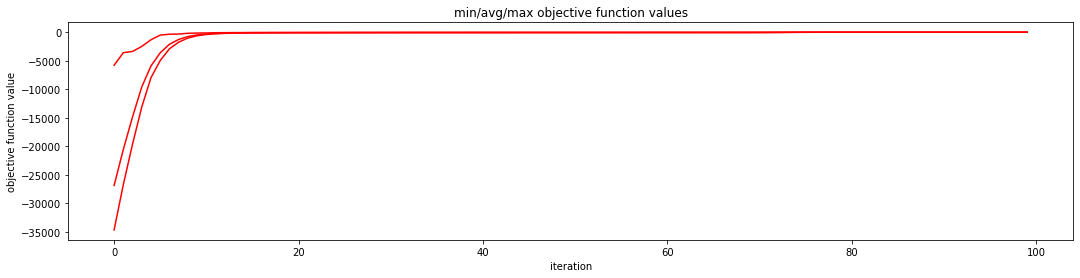

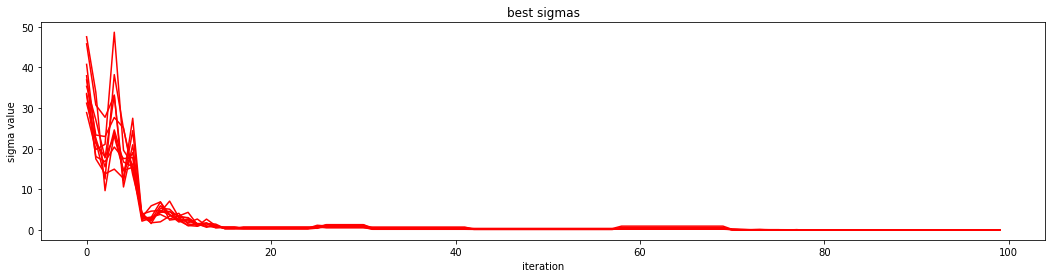

In [50]:
d = 10
N = 2000
T = 100

best_objective_value, best_chromosome, history_objective_values, history_best_chromosome, history_best_sigmas = es(
    objective_function_F6, d, N, T, 2*N, 2, 50.0, 1/np.sqrt(2*d), 1/np.sqrt(2*np.sqrt(d)), 10)

plt.figure(figsize=(18, 4))
plt.plot(history_objective_values[:, 0], 'r-')
plt.plot(history_objective_values[:, 1], 'r-')
plt.plot(history_objective_values[:, 2], 'r-')
plt.xlabel('iteration')
plt.ylabel('objective function value')
plt.title('min/avg/max objective function values')
plt.show()

plt.figure(figsize=(18, 4))
plt.plot(history_best_sigmas, 'r-')
plt.xlabel('iteration')
plt.ylabel('sigma value')
plt.title('best sigmas')
plt.show()

Iteration 0000 : best score = -19408.27378089, mean score = -59175.89951830.
Iteration 0010 : best score = -1264.05675612, mean score = -2536.77372718.
Iteration 0020 : best score = -158.32824784, mean score = -246.47651641.
Iteration 0030 : best score = -113.00567172, mean score = -171.73294333.
Iteration 0040 : best score = -95.11965903, mean score = -154.09879515.
Iteration 0050 : best score = -95.11965903, mean score = -144.31116540.
Iteration 0060 : best score = -60.20494762, mean score = -129.02510618.
Iteration 0070 : best score = -19.31178113, mean score = -22.93038341.
Iteration 0080 : best score = -16.95769113, mean score = -17.04342912.
Iteration 0090 : best score = -16.91537605, mean score = -16.91735829.
Iteration 0100 : best score = -16.91433770, mean score = -16.91439181.
Iteration 0110 : best score = -16.91430509, mean score = -16.91430681.
Iteration 0120 : best score = -16.91430400, mean score = -16.91430405.
Iteration 0130 : best score = -16.91430397, mean score = -16

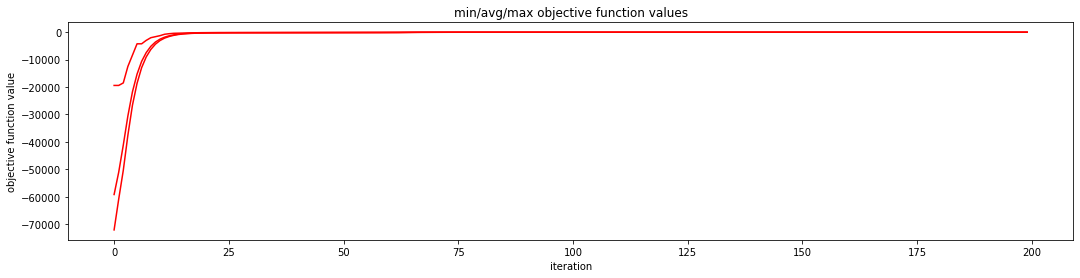

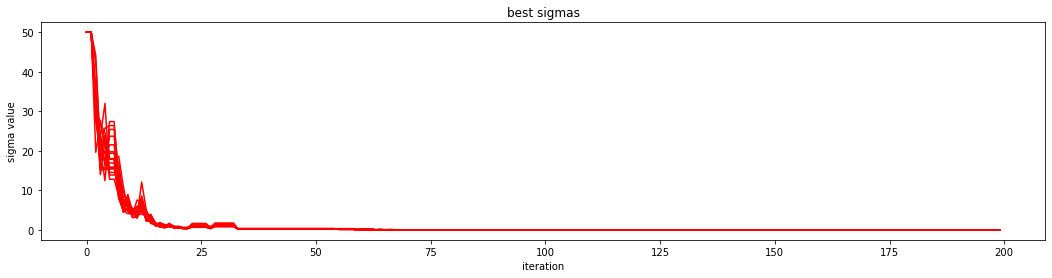

In [53]:
d = 20
N = 2000
T = 200

best_objective_value, best_chromosome, history_objective_values, history_best_chromosome, history_best_sigmas = es(
    objective_function_F6, d, N, T, 2*N, 2, 50.0, 1/np.sqrt(2*d), 1/np.sqrt(2*np.sqrt(d)), 10)

plt.figure(figsize=(18, 4))
plt.plot(history_objective_values[:, 0], 'r-')
plt.plot(history_objective_values[:, 1], 'r-')
plt.plot(history_objective_values[:, 2], 'r-')
plt.xlabel('iteration')
plt.ylabel('objective function value')
plt.title('min/avg/max objective function values')
plt.show()

plt.figure(figsize=(18, 4))
plt.plot(history_best_sigmas, 'r-')
plt.xlabel('iteration')
plt.ylabel('sigma value')
plt.title('best sigmas')
plt.show()

Iteration 0000 : best score = -17797.37801860, mean score = -66976.21582870.
Iteration 0010 : best score = -17797.37801860, mean score = -66798.87239825.
Iteration 0020 : best score = -17797.37801860, mean score = -66588.76020919.
Iteration 0030 : best score = -17797.37801860, mean score = -66442.24065174.
Iteration 0040 : best score = -17797.37801860, mean score = -66216.57628501.
Iteration 0050 : best score = -17797.37801860, mean score = -65776.63141445.
Iteration 0060 : best score = -17797.37801860, mean score = -64817.47411326.
Iteration 0070 : best score = -5392.79353860, mean score = -39458.64689589.
Iteration 0080 : best score = -209.30813080, mean score = -455.80562802.
Iteration 0090 : best score = -92.30885837, mean score = -179.43062371.
Iteration 0100 : best score = -91.19699185, mean score = -155.84313545.
Iteration 0110 : best score = -91.19699185, mean score = -145.53460617.
Iteration 0120 : best score = -82.92809177, mean score = -137.41090812.
Iteration 0130 : best sc

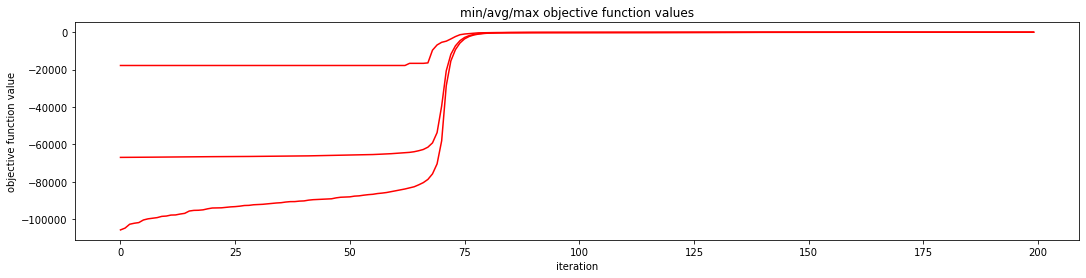

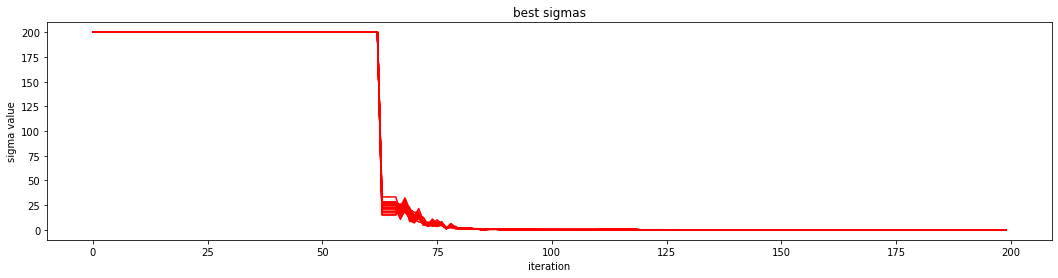

In [62]:
# wikesza ilosc iteracji i sigma poczatkowa 200
d = 20
N = 4000
T = 200

best_objective_value, best_chromosome, history_objective_values, history_best_chromosome, history_best_sigmas = es(
    objective_function_F6, d, N, T, 2*N, 2, 200.0, 1/np.sqrt(2*d), 1/np.sqrt(2*np.sqrt(d)), 10)

plt.figure(figsize=(18, 4))
plt.plot(history_objective_values[:, 0], 'r-')
plt.plot(history_objective_values[:, 1], 'r-')
plt.plot(history_objective_values[:, 2], 'r-')
plt.xlabel('iteration')
plt.ylabel('objective function value')
plt.title('min/avg/max objective function values')
plt.show()

plt.figure(figsize=(18, 4))
plt.plot(history_best_sigmas, 'r-')
plt.xlabel('iteration')
plt.ylabel('sigma value')
plt.title('best sigmas')
plt.show()

Iteration 0000 : best score = -96925.39382408, mean score = -161164.40892575.
Iteration 0010 : best score = -19332.62236640, mean score = -28818.47152743.
Iteration 0020 : best score = -4131.04580606, mean score = -5577.80275269.
Iteration 0030 : best score = -1202.51547951, mean score = -1628.79290994.
Iteration 0040 : best score = -608.40385191, mean score = -789.08345240.
Iteration 0050 : best score = -482.45281082, mean score = -597.50168507.
Iteration 0060 : best score = -408.77058305, mean score = -539.27448855.
Iteration 0070 : best score = -408.77058305, mean score = -510.57849213.
Iteration 0080 : best score = -408.77058305, mean score = -493.86569096.
Iteration 0090 : best score = -397.72802797, mean score = -480.71536456.
Iteration 0100 : best score = -330.38488087, mean score = -449.22951363.
Iteration 0110 : best score = -187.87073599, mean score = -221.97427339.
Iteration 0120 : best score = -131.81587209, mean score = -142.28333704.
Iteration 0130 : best score = -109.063

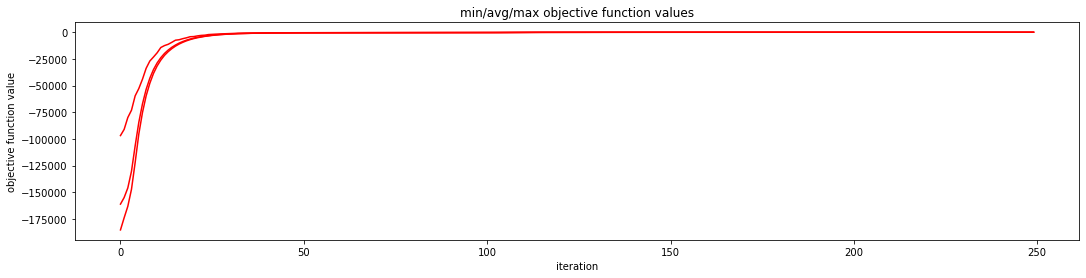

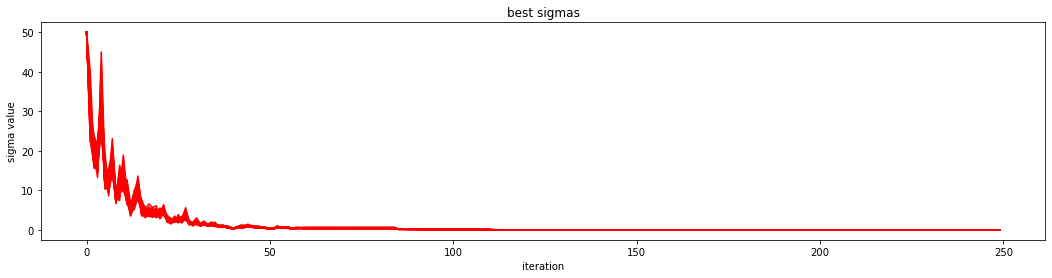

In [65]:
# na poczatkowych sigmach 200 nie działało zbyt dobrze (nie chciało polepszać wartosći)
d = 50
N = 4000
T = 250

best_objective_value, best_chromosome, history_objective_values, history_best_chromosome, history_best_sigmas = es(
    objective_function_F6, d, N, T, 2*N, 2, 50.0, 1/np.sqrt(2*d), 1/np.sqrt(2*np.sqrt(d)), 10)

plt.figure(figsize=(18, 4))
plt.plot(history_objective_values[:, 0], 'r-')
plt.plot(history_objective_values[:, 1], 'r-')
plt.plot(history_objective_values[:, 2], 'r-')
plt.xlabel('iteration')
plt.ylabel('objective function value')
plt.title('min/avg/max objective function values')
plt.show()

plt.figure(figsize=(18, 4))
plt.plot(history_best_sigmas, 'r-')
plt.xlabel('iteration')
plt.ylabel('sigma value')
plt.title('best sigmas')
plt.show()

Iteration 0000 : best score = -97980.85975597, mean score = -166864.46919213.
Iteration 0010 : best score = -97980.85975597, mean score = -165402.08183941.
Iteration 0020 : best score = -97466.44561415, mean score = -162987.08035490.
Iteration 0030 : best score = -31044.09023447, mean score = -52072.76854170.
Iteration 0040 : best score = -5292.71353762, mean score = -7253.20337082.
Iteration 0050 : best score = -1473.19666209, mean score = -1924.41379727.
Iteration 0060 : best score = -673.22432959, mean score = -832.37944977.
Iteration 0070 : best score = -486.52517359, mean score = -609.26405318.
Iteration 0080 : best score = -432.80529026, mean score = -540.39507479.
Iteration 0090 : best score = -403.19204598, mean score = -509.52235021.
Iteration 0100 : best score = -384.19057829, mean score = -489.88585091.
Iteration 0110 : best score = -371.45026148, mean score = -472.43163733.
Iteration 0120 : best score = -210.58578149, mean score = -267.83891370.
Iteration 0130 : best score 

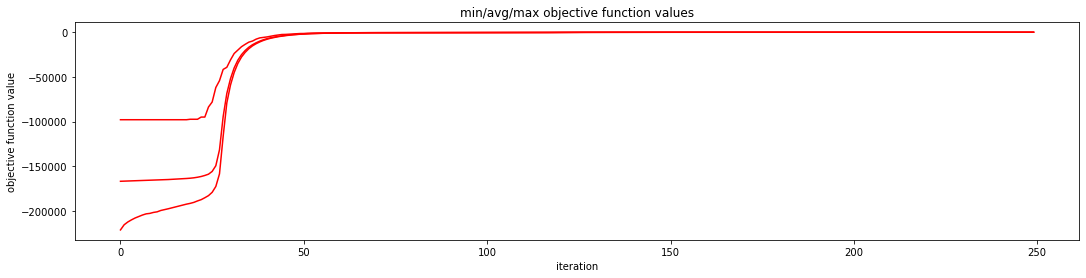

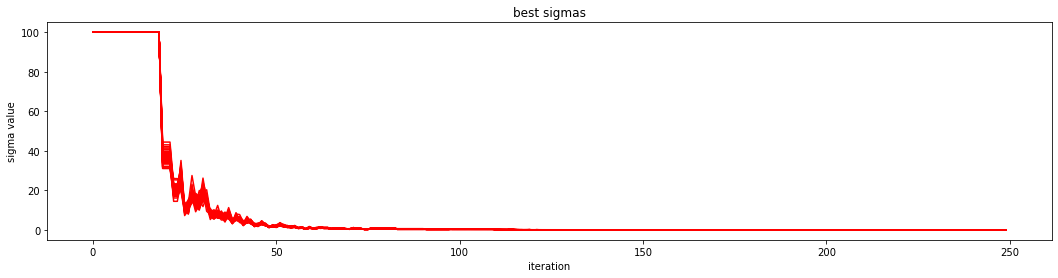

In [66]:
# na poczatkowych sigmach 200 nie działało zbyt dobrze (nie chciało polepszać wartosći)
d = 50
N = 4000
T = 250

best_objective_value, best_chromosome, history_objective_values, history_best_chromosome, history_best_sigmas = es(
    objective_function_F6, d, N, T, 2*N, 2, 100.0, 1/np.sqrt(2*d), 1/np.sqrt(2*np.sqrt(d)), 10)

plt.figure(figsize=(18, 4))
plt.plot(history_objective_values[:, 0], 'r-')
plt.plot(history_objective_values[:, 1], 'r-')
plt.plot(history_objective_values[:, 2], 'r-')
plt.xlabel('iteration')
plt.ylabel('objective function value')
plt.title('min/avg/max objective function values')
plt.show()

plt.figure(figsize=(18, 4))
plt.plot(history_best_sigmas, 'r-')
plt.xlabel('iteration')
plt.ylabel('sigma value')
plt.title('best sigmas')
plt.show()

Iteration 0000 : best score = -219376.63495739, mean score = -330935.37267198.
Iteration 0010 : best score = -94450.15280551, mean score = -124486.93622846.
Iteration 0020 : best score = -38595.48674122, mean score = -46348.15431166.
Iteration 0030 : best score = -18012.52565879, mean score = -21987.61703537.
Iteration 0040 : best score = -9418.04059773, mean score = -10883.33884122.
Iteration 0050 : best score = -4942.40637226, mean score = -5881.47440077.
Iteration 0060 : best score = -2938.20525540, mean score = -3392.92817829.
Iteration 0070 : best score = -1980.74790885, mean score = -2248.01040467.
Iteration 0080 : best score = -1507.35839131, mean score = -1724.37639105.
Iteration 0090 : best score = -1255.36842241, mean score = -1485.58760492.
Iteration 0100 : best score = -1178.32896193, mean score = -1362.27353937.
Iteration 0110 : best score = -1138.01084139, mean score = -1288.14850644.
Iteration 0120 : best score = -986.78803342, mean score = -1195.16606512.
Iteration 0130

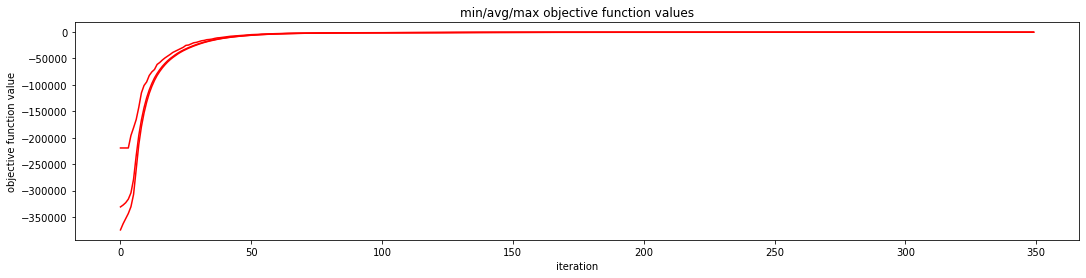

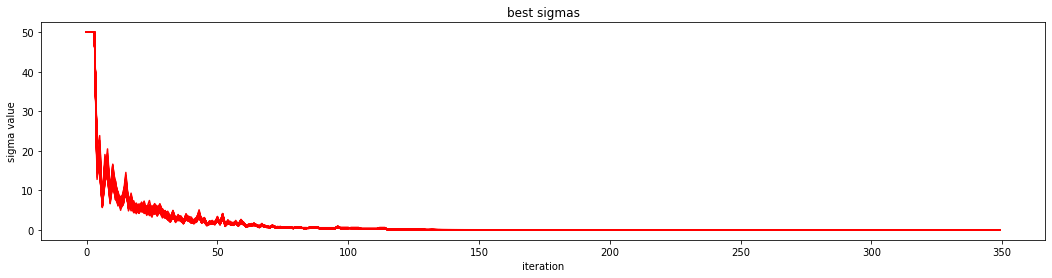

In [70]:
d = 100
N = 4000
T = 350

best_objective_value, best_chromosome, history_objective_values, history_best_chromosome, history_best_sigmas = es(
    objective_function_F6, d, N, T, 2*N, 2, 50.0, 1/np.sqrt(2*d), 1/np.sqrt(2*np.sqrt(d)), 10)

plt.figure(figsize=(18, 4))
plt.plot(history_objective_values[:, 0], 'r-')
plt.plot(history_objective_values[:, 1], 'r-')
plt.plot(history_objective_values[:, 2], 'r-')
plt.xlabel('iteration')
plt.ylabel('objective function value')
plt.title('min/avg/max objective function values')
plt.show()

plt.figure(figsize=(18, 4))
plt.plot(history_best_sigmas, 'r-')
plt.xlabel('iteration')
plt.ylabel('sigma value')
plt.title('best sigmas')
plt.show()

Iteration 0000 : best score = -234682.49753772, mean score = -327893.10983094.
Iteration 0010 : best score = -87917.76869336, mean score = -110557.61771436.
Iteration 0020 : best score = -44401.87990790, mean score = -51194.75415911.
Iteration 0030 : best score = -24747.44185907, mean score = -28676.34656549.
Iteration 0040 : best score = -14823.08770219, mean score = -17028.35824661.
Iteration 0050 : best score = -9351.12812363, mean score = -10421.49552249.
Iteration 0060 : best score = -5959.52962830, mean score = -6626.90246907.
Iteration 0070 : best score = -4011.56761525, mean score = -4429.36609917.
Iteration 0080 : best score = -2877.44422522, mean score = -3183.44160724.
Iteration 0090 : best score = -2210.32065929, mean score = -2476.99137859.
Iteration 0100 : best score = -1852.20210382, mean score = -2095.53917786.
Iteration 0110 : best score = -1687.99279182, mean score = -1863.91962296.
Iteration 0120 : best score = -1550.32306567, mean score = -1736.77978946.
Iteration 0

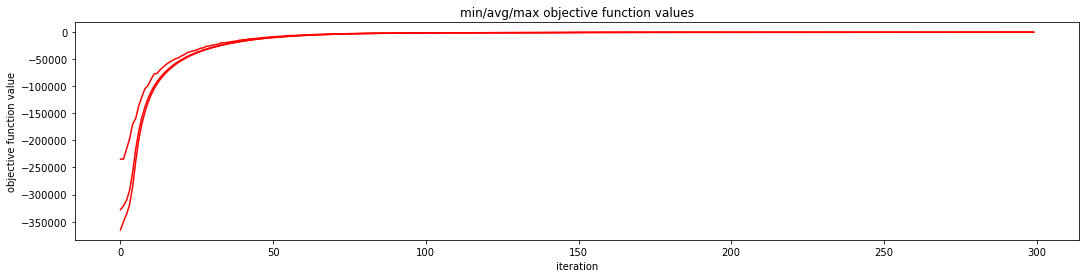

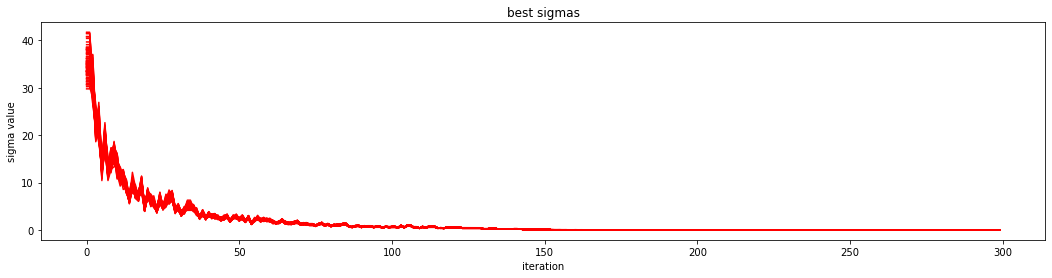

In [71]:
d = 100
N = 4000
T = 300

best_objective_value, best_chromosome, history_objective_values, history_best_chromosome, history_best_sigmas = es(
    objective_function_F6, d, N, T, 2*N, 10, 50.0, 1/np.sqrt(2*d), 1/np.sqrt(2*np.sqrt(d)), 10)

plt.figure(figsize=(18, 4))
plt.plot(history_objective_values[:, 0], 'r-')
plt.plot(history_objective_values[:, 1], 'r-')
plt.plot(history_objective_values[:, 2], 'r-')
plt.xlabel('iteration')
plt.ylabel('objective function value')
plt.title('min/avg/max objective function values')
plt.show()

plt.figure(figsize=(18, 4))
plt.plot(history_best_sigmas, 'r-')
plt.xlabel('iteration')
plt.ylabel('sigma value')
plt.title('best sigmas')
plt.show()

### Działanie strategii ewolucyjnej dla funkcji Griewanka F8

Iteration 0000 : best score = -2.47743583, mean score = -7.63896974.
Iteration 0010 : best score = -0.73955357, mean score = -1.05004005.
Iteration 0020 : best score = -0.13676960, mean score = -0.60476130.
Iteration 0030 : best score = -0.00078523, mean score = -0.00354317.
Iteration 0040 : best score = -0.00000300, mean score = -0.00001665.
Iteration 0050 : best score = -0.00000001, mean score = -0.00000008.
Iteration 0060 : best score = -0.00000000, mean score = -0.00000000.
Iteration 0070 : best score = -0.00000000, mean score = -0.00000000.
Iteration 0080 : best score = -0.00000000, mean score = -0.00000000.
Iteration 0090 : best score = 0.00000000, mean score = 0.00000000.


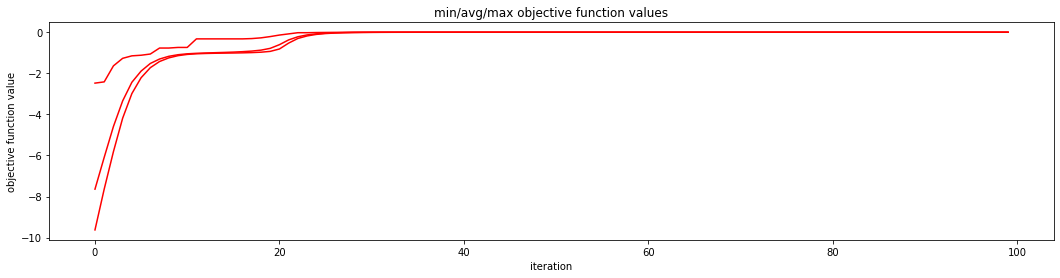

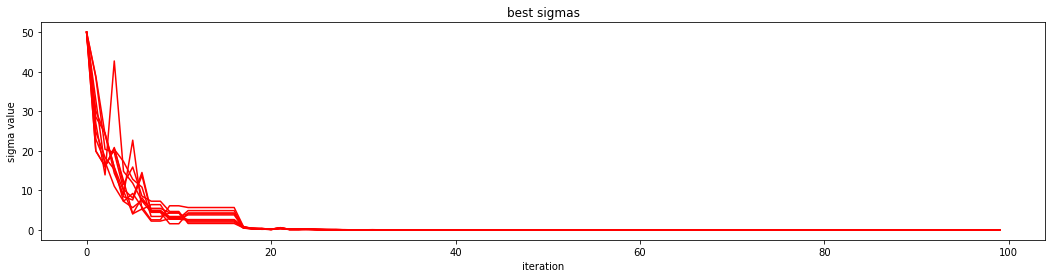

In [72]:
d = 10
N = 2000
T = 100

best_objective_value, best_chromosome, history_objective_values, history_best_chromosome, history_best_sigmas = es(
    objective_function_F8, d, N, T, 2*N, 2, 50.0, 1/np.sqrt(2*d), 1/np.sqrt(2*np.sqrt(d)), 10)

plt.figure(figsize=(18, 4))
plt.plot(history_objective_values[:, 0], 'r-')
plt.plot(history_objective_values[:, 1], 'r-')
plt.plot(history_objective_values[:, 2], 'r-')
plt.xlabel('iteration')
plt.ylabel('objective function value')
plt.title('min/avg/max objective function values')
plt.show()

plt.figure(figsize=(18, 4))
plt.plot(history_best_sigmas, 'r-')
plt.xlabel('iteration')
plt.ylabel('sigma value')
plt.title('best sigmas')
plt.show()

Iteration 0000 : best score = -6.92750911, mean score = -15.86810290.
Iteration 0010 : best score = -1.23420790, mean score = -1.62100202.
Iteration 0020 : best score = -0.82354412, mean score = -1.01000859.
Iteration 0030 : best score = -0.05741447, mean score = -0.11851370.
Iteration 0040 : best score = -0.00619047, mean score = -0.01165445.
Iteration 0050 : best score = -0.00058273, mean score = -0.00126153.
Iteration 0060 : best score = -0.00004485, mean score = -0.00011032.
Iteration 0070 : best score = -0.00000304, mean score = -0.00000855.
Iteration 0080 : best score = -0.00000023, mean score = -0.00000046.
Iteration 0090 : best score = -0.00000001, mean score = -0.00000002.


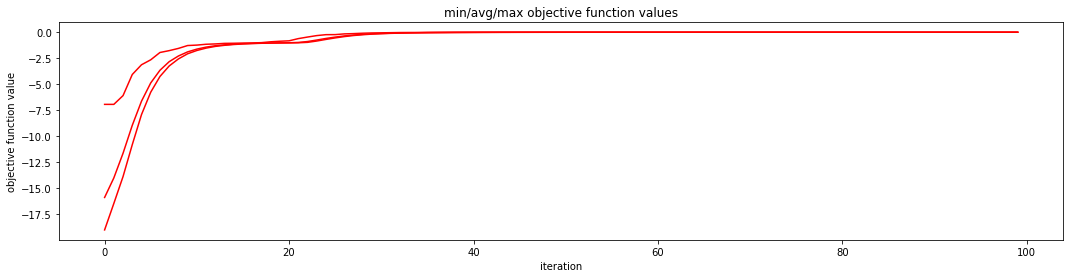

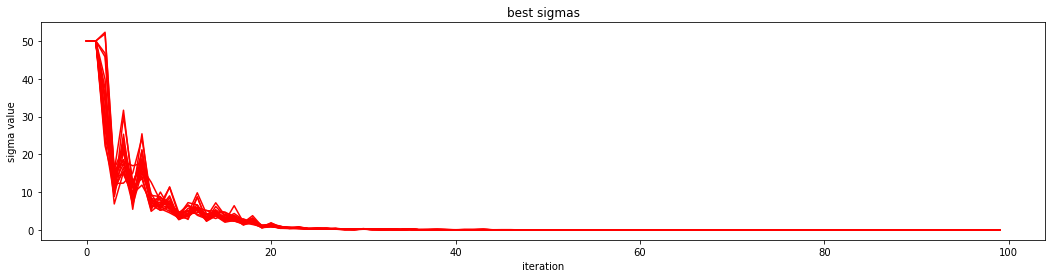

In [73]:
d = 20
N = 2000
T = 100

best_objective_value, best_chromosome, history_objective_values, history_best_chromosome, history_best_sigmas = es(
    objective_function_F8, d, N, T, 2*N, 2, 50.0, 1/np.sqrt(2*d), 1/np.sqrt(2*np.sqrt(d)), 10)

plt.figure(figsize=(18, 4))
plt.plot(history_objective_values[:, 0], 'r-')
plt.plot(history_objective_values[:, 1], 'r-')
plt.plot(history_objective_values[:, 2], 'r-')
plt.xlabel('iteration')
plt.ylabel('objective function value')
plt.title('min/avg/max objective function values')
plt.show()

plt.figure(figsize=(18, 4))
plt.plot(history_best_sigmas, 'r-')
plt.xlabel('iteration')
plt.ylabel('sigma value')
plt.title('best sigmas')
plt.show()

Iteration 0000 : best score = -25.41788902, mean score = -41.24674199.
Iteration 0010 : best score = -5.21306581, mean score = -7.96025849.
Iteration 0020 : best score = -1.85409719, mean score = -2.21278209.
Iteration 0030 : best score = -1.18747867, mean score = -1.25172294.
Iteration 0040 : best score = -1.04147210, mean score = -1.05815264.
Iteration 0050 : best score = -0.67697855, mean score = -0.81603303.
Iteration 0060 : best score = -0.33445236, mean score = -0.40567854.
Iteration 0070 : best score = -0.18127614, mean score = -0.21140529.
Iteration 0080 : best score = -0.09770125, mean score = -0.11523608.
Iteration 0090 : best score = -0.05767824, mean score = -0.06464367.


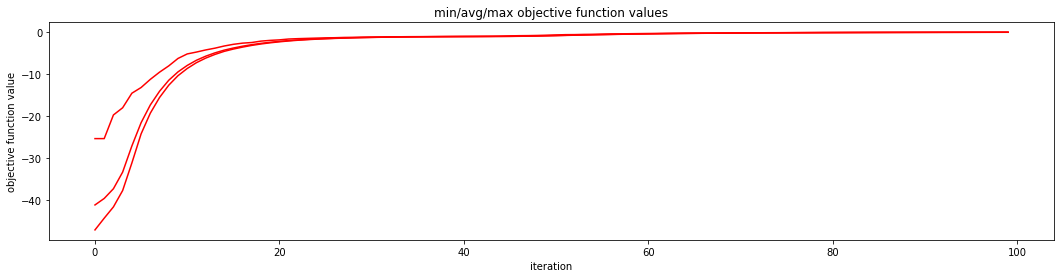

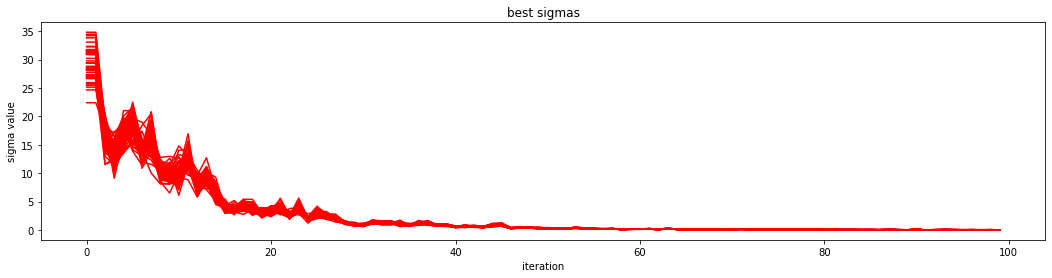

In [74]:
d = 50
N = 2000
T = 100

best_objective_value, best_chromosome, history_objective_values, history_best_chromosome, history_best_sigmas = es(
    objective_function_F8, d, N, T, 2*N, 2, 50.0, 1/np.sqrt(2*d), 1/np.sqrt(2*np.sqrt(d)), 10)

plt.figure(figsize=(18, 4))
plt.plot(history_objective_values[:, 0], 'r-')
plt.plot(history_objective_values[:, 1], 'r-')
plt.plot(history_objective_values[:, 2], 'r-')
plt.xlabel('iteration')
plt.ylabel('objective function value')
plt.title('min/avg/max objective function values')
plt.show()

plt.figure(figsize=(18, 4))
plt.plot(history_best_sigmas, 'r-')
plt.xlabel('iteration')
plt.ylabel('sigma value')
plt.title('best sigmas')
plt.show()

Iteration 0000 : best score = -58.95290915, mean score = -83.56379268.
Iteration 0010 : best score = -26.88489100, mean score = -33.81661310.
Iteration 0020 : best score = -11.15522788, mean score = -13.41862738.
Iteration 0030 : best score = -6.02190903, mean score = -6.79941203.
Iteration 0040 : best score = -3.33643020, mean score = -3.75834697.
Iteration 0050 : best score = -2.12643599, mean score = -2.31251176.
Iteration 0060 : best score = -1.54000122, mean score = -1.64928089.
Iteration 0070 : best score = -1.27732246, mean score = -1.32630005.
Iteration 0080 : best score = -1.14563773, mean score = -1.16617395.
Iteration 0090 : best score = -1.07170176, mean score = -1.08470106.
Iteration 0100 : best score = -0.93121900, mean score = -0.98981071.
Iteration 0110 : best score = -0.69855942, mean score = -0.75755980.
Iteration 0120 : best score = -0.52229402, mean score = -0.56423259.
Iteration 0130 : best score = -0.38995492, mean score = -0.42380002.
Iteration 0140 : best score 

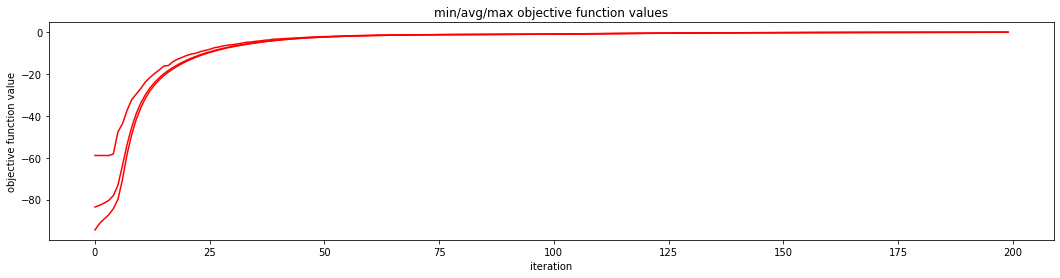

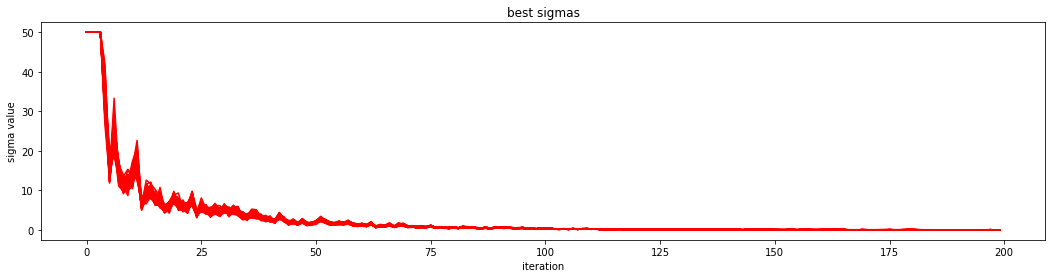

In [76]:
d = 100
N = 2000
T = 200

best_objective_value, best_chromosome, history_objective_values, history_best_chromosome, history_best_sigmas = es(
    objective_function_F8, d, N, T, 2*N, 2, 50.0, 1/np.sqrt(2*d), 1/np.sqrt(2*np.sqrt(d)), 10)

plt.figure(figsize=(18, 4))
plt.plot(history_objective_values[:, 0], 'r-')
plt.plot(history_objective_values[:, 1], 'r-')
plt.plot(history_objective_values[:, 2], 'r-')
plt.xlabel('iteration')
plt.ylabel('objective function value')
plt.title('min/avg/max objective function values')
plt.show()

plt.figure(figsize=(18, 4))
plt.plot(history_best_sigmas, 'r-')
plt.xlabel('iteration')
plt.ylabel('sigma value')
plt.title('best sigmas')
plt.show()

### Działanie strategii ewolucyjnej dla funkcji Schwefela F7

Iteration 0000 : best score = -3669.11369663, mean score = -3924.46476953.
Iteration 0010 : best score = -3498.13530832, mean score = -3556.60003145.
Iteration 0020 : best score = -2599.90792541, mean score = -3320.58975091.
Iteration 0030 : best score = -2081.50293278, mean score = -3124.60027211.
Iteration 0040 : best score = -1797.26803835, mean score = -2133.15880177.
Iteration 0050 : best score = -1715.75455046, mean score = -1934.43848981.
Iteration 0060 : best score = -1582.91124564, mean score = -1591.25777848.
Iteration 0070 : best score = -1579.53280784, mean score = -1579.96726598.
Iteration 0080 : best score = -1579.25853816, mean score = -1579.28108235.
Iteration 0090 : best score = -1579.25462478, mean score = -1579.25469170.
Iteration 0100 : best score = -1579.25461550, mean score = -1579.25461563.
Iteration 0110 : best score = -1579.25461548, mean score = -1579.25461548.
Iteration 0120 : best score = -1579.25461548, mean score = -1579.25461548.
Iteration 0130 : best sco

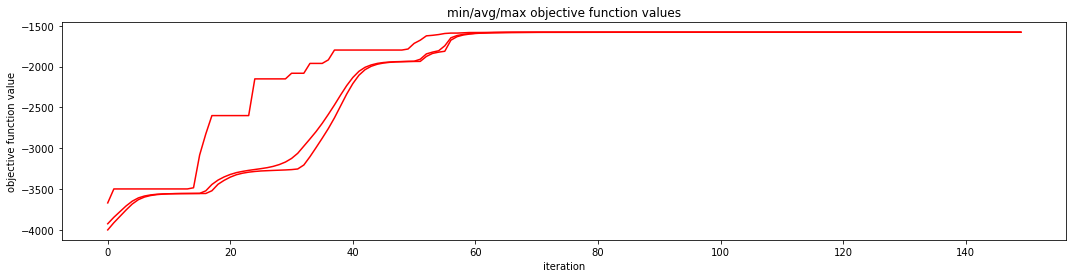

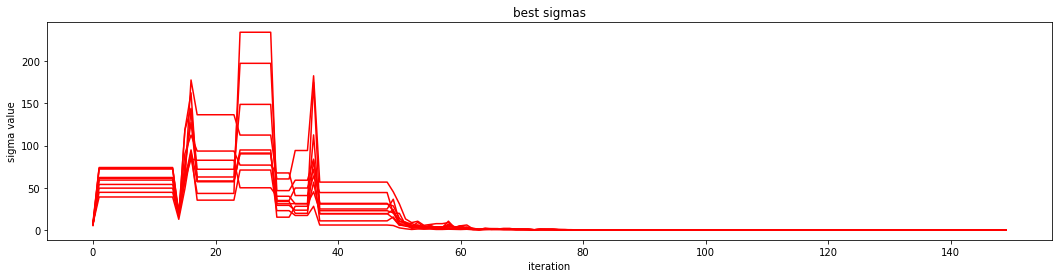

In [86]:
#dodanie sprawdzania dziedziny w es, zmniejszenie sigm na 30, zwiekszenie populacji
# przy sigm 50, 30, sigmy nie chcialy sie "wygluszyc" i najlepsze rozwiazania na poziuomie -1500
# przy sigma 10 sigma sie wyciszaly, ale rozwiazanie na poziomie -3500
#najlepiej na 20, -1500
d = 10
N = 4000
T = 150

best_objective_value, best_chromosome, history_objective_values, history_best_chromosome, history_best_sigmas = es(
    objective_function_F7, d, N, T, 2*N, 2, 20.0, 1/np.sqrt(2*d), 1/np.sqrt(2*np.sqrt(d)), 10, check_range = True, domain = (-500, 500))

plt.figure(figsize=(18, 4))
plt.plot(history_objective_values[:, 0], 'r-')
plt.plot(history_objective_values[:, 1], 'r-')
plt.plot(history_objective_values[:, 2], 'r-')
plt.xlabel('iteration')
plt.ylabel('objective function value')
plt.title('min/avg/max objective function values')
plt.show()

plt.figure(figsize=(18, 4))
plt.plot(history_best_sigmas, 'r-')
plt.xlabel('iteration')
plt.ylabel('sigma value')
plt.title('best sigmas')
plt.show()

Iteration 0000 : best score = -6077.11933000, mean score = -7949.98732009.
Iteration 0010 : best score = -5103.32823983, mean score = -6975.25183566.
Iteration 0020 : best score = -4682.94529024, mean score = -6662.71739646.
Iteration 0030 : best score = -4682.94529024, mean score = -6471.41347807.
Iteration 0040 : best score = -4682.94529024, mean score = -6327.62361519.
Iteration 0050 : best score = -4682.94529024, mean score = -6217.09272609.
Iteration 0060 : best score = -4682.94529024, mean score = -6118.43497824.
Iteration 0070 : best score = -4576.67927438, mean score = -6038.09691415.
Iteration 0080 : best score = -4576.67927438, mean score = -5970.96573409.
Iteration 0090 : best score = -4546.62511792, mean score = -5913.74714146.
Iteration 0100 : best score = -4546.62511792, mean score = -5869.02859204.
Iteration 0110 : best score = -4546.62511792, mean score = -5830.07199773.
Iteration 0120 : best score = -4546.62511792, mean score = -5792.09062380.
Iteration 0130 : best sco

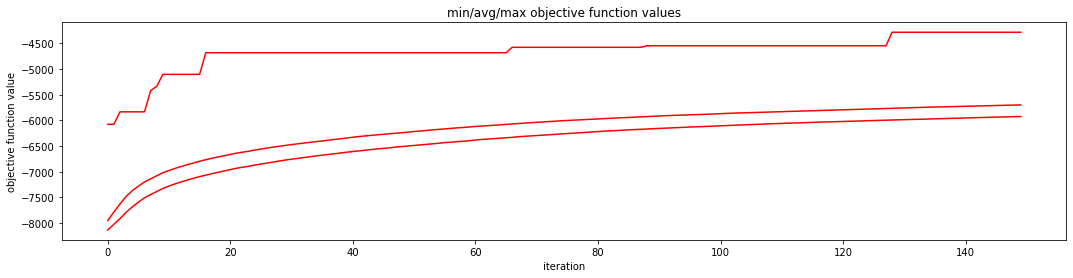

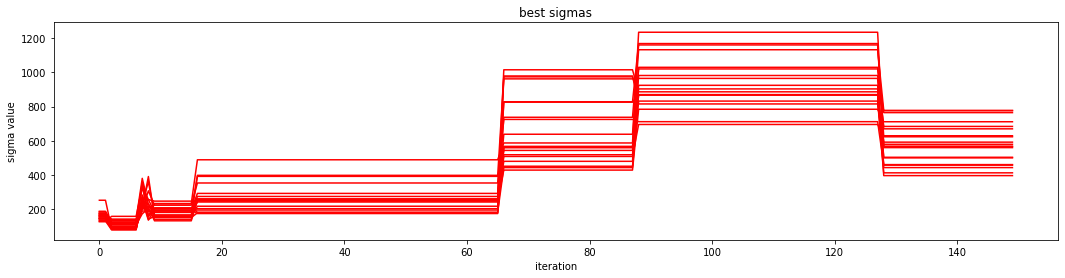

In [96]:
d = 20
N = 4000
T = 150

best_objective_value, best_chromosome, history_objective_values, history_best_chromosome, history_best_sigmas = es(
    objective_function_F7, d, N, T, 2*N, 2, 100.0, 1/np.sqrt(2*d), 1/np.sqrt(2*np.sqrt(d)), 10, check_range = True, domain = (-500, 500))

plt.figure(figsize=(18, 4))
plt.plot(history_objective_values[:, 0], 'r-')
plt.plot(history_objective_values[:, 1], 'r-')
plt.plot(history_objective_values[:, 2], 'r-')
plt.xlabel('iteration')
plt.ylabel('objective function value')
plt.title('min/avg/max objective function values')
plt.show()

plt.figure(figsize=(18, 4))
plt.plot(history_best_sigmas, 'r-')
plt.xlabel('iteration')
plt.ylabel('sigma value')
plt.title('best sigmas')
plt.show()

Iteration 0000 : best score = -6454.03793977, mean score = -7957.07641118.
Iteration 0010 : best score = -4982.42952542, mean score = -6936.19434483.
Iteration 0020 : best score = -4982.42952542, mean score = -6621.96623920.
Iteration 0030 : best score = -4886.08711329, mean score = -6421.21126900.
Iteration 0040 : best score = -4810.03320331, mean score = -6266.85237140.
Iteration 0050 : best score = -4559.13172847, mean score = -6144.17084340.
Iteration 0060 : best score = -4559.13172847, mean score = -6047.60995386.
Iteration 0070 : best score = -4559.13172847, mean score = -5966.85702104.
Iteration 0080 : best score = -4559.13172847, mean score = -5898.45391480.
Iteration 0090 : best score = -4535.32083951, mean score = -5848.79455128.
Iteration 0100 : best score = -4535.32083951, mean score = -5803.39286569.
Iteration 0110 : best score = -4535.32083951, mean score = -5764.29360968.
Iteration 0120 : best score = -4535.32083951, mean score = -5727.07068948.
Iteration 0130 : best sco

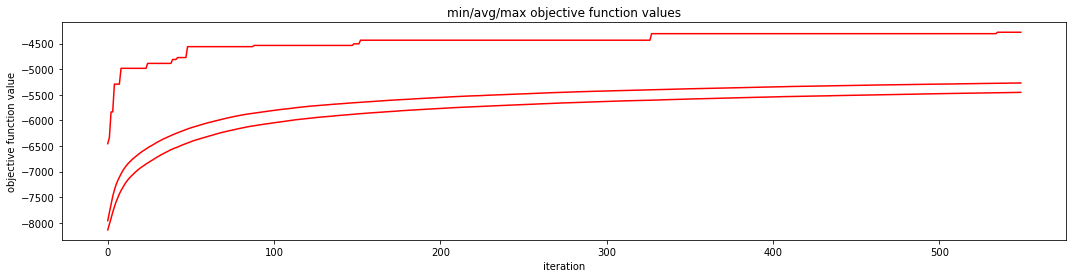

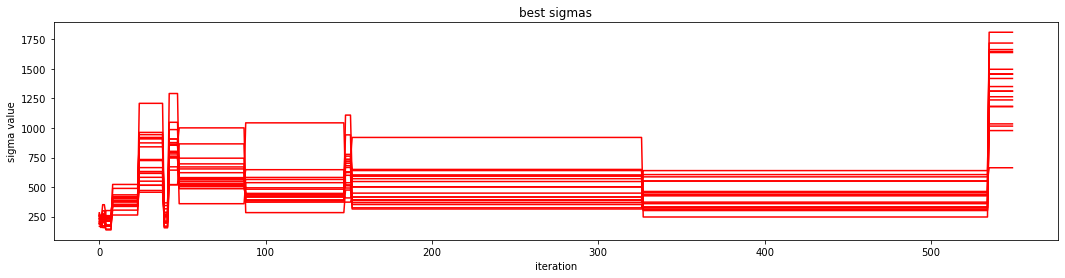

In [98]:
#moze wystarczy zwiekszyc liczbe iteracji
d = 20
N = 4000
T = 550

best_objective_value, best_chromosome, history_objective_values, history_best_chromosome, history_best_sigmas = es(
    objective_function_F7, d, N, T, 2*N, 2, 100.0, 1/np.sqrt(2*d), 1/np.sqrt(2*np.sqrt(d)), 10, check_range = True, domain = (-500, 500))

plt.figure(figsize=(18, 4))
plt.plot(history_objective_values[:, 0], 'r-')
plt.plot(history_objective_values[:, 1], 'r-')
plt.plot(history_objective_values[:, 2], 'r-')
plt.xlabel('iteration')
plt.ylabel('objective function value')
plt.title('min/avg/max objective function values')
plt.show()

plt.figure(figsize=(18, 4))
plt.plot(history_best_sigmas, 'r-')
plt.xlabel('iteration')
plt.ylabel('sigma value')
plt.title('best sigmas')
plt.show()

Iteration 0000 : best score = -17307.39304051, mean score = -19919.05997287.
Iteration 0010 : best score = -16135.97474433, mean score = -18544.47879029.
Iteration 0020 : best score = -14574.71489916, mean score = -18123.81371583.
Iteration 0030 : best score = -14574.71489916, mean score = -17840.35780517.
Iteration 0040 : best score = -14574.71489916, mean score = -17594.54175646.
Iteration 0050 : best score = -14574.71489916, mean score = -17388.50308720.
Iteration 0060 : best score = -14574.71489916, mean score = -17204.66920678.
Iteration 0070 : best score = -14574.71489916, mean score = -17056.71276911.
Iteration 0080 : best score = -14285.76398085, mean score = -16930.97842303.
Iteration 0090 : best score = -14285.76398085, mean score = -16827.55845725.
Iteration 0100 : best score = -14285.76398085, mean score = -16743.63755454.
Iteration 0110 : best score = -14285.76398085, mean score = -16655.92185120.
Iteration 0120 : best score = -14285.76398085, mean score = -16588.91014410.

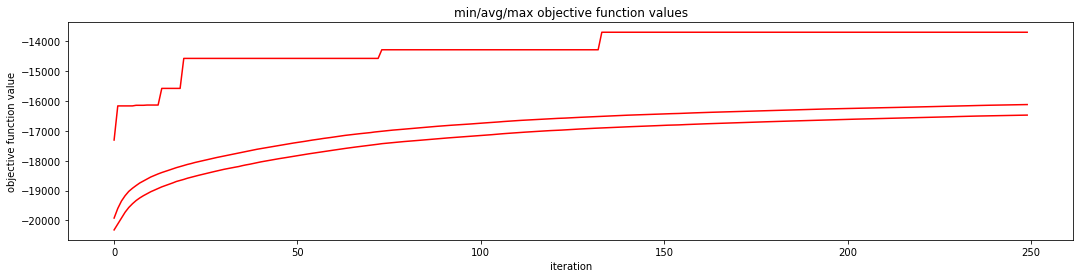

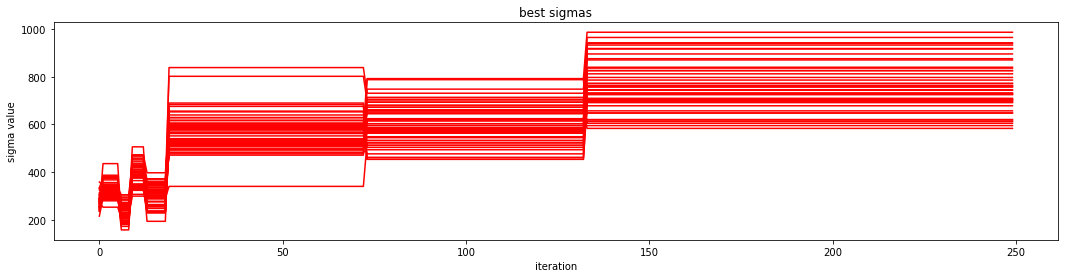

In [99]:
d = 50
N = 4000
T = 250

best_objective_value, best_chromosome, history_objective_values, history_best_chromosome, history_best_sigmas = es(
    objective_function_F7, d, N, T, 2*N, 2, 200.0, 1/np.sqrt(2*d), 1/np.sqrt(2*np.sqrt(d)), 10, check_range = True, domain = (-500, 500))

plt.figure(figsize=(18, 4))
plt.plot(history_objective_values[:, 0], 'r-')
plt.plot(history_objective_values[:, 1], 'r-')
plt.plot(history_objective_values[:, 2], 'r-')
plt.xlabel('iteration')
plt.ylabel('objective function value')
plt.title('min/avg/max objective function values')
plt.show()

plt.figure(figsize=(18, 4))
plt.plot(history_best_sigmas, 'r-')
plt.xlabel('iteration')
plt.ylabel('sigma value')
plt.title('best sigmas')
plt.show()

Iteration 0000 : best score = -15617.73729666, mean score = -19861.99767640.
Iteration 0010 : best score = -14609.53793192, mean score = -17775.13892284.
Iteration 0020 : best score = -14609.53793192, mean score = -17305.12091191.
Iteration 0030 : best score = -14408.29960287, mean score = -17039.18993020.
Iteration 0040 : best score = -14310.75262061, mean score = -16863.02784088.
Iteration 0050 : best score = -14200.52004116, mean score = -16729.62630427.
Iteration 0060 : best score = -14200.52004116, mean score = -16626.38014628.
Iteration 0070 : best score = -14200.52004116, mean score = -16545.40763056.
Iteration 0080 : best score = -14200.52004116, mean score = -16479.39964478.
Iteration 0090 : best score = -14200.52004116, mean score = -16418.92791915.
Iteration 0100 : best score = -14200.52004116, mean score = -16363.89730545.
Iteration 0110 : best score = -14200.52004116, mean score = -16315.88481874.
Iteration 0120 : best score = -14200.52004116, mean score = -16273.90780337.

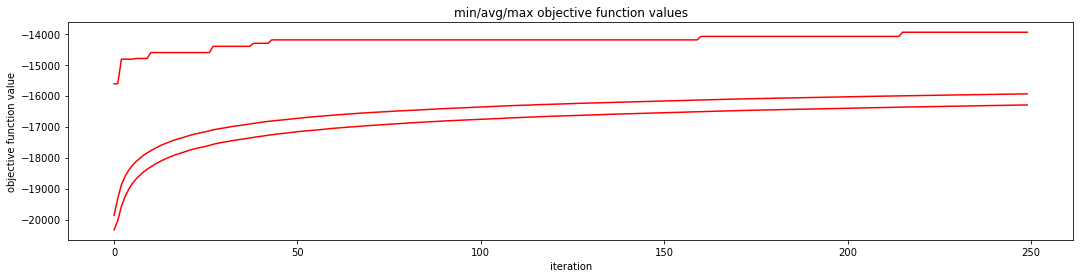

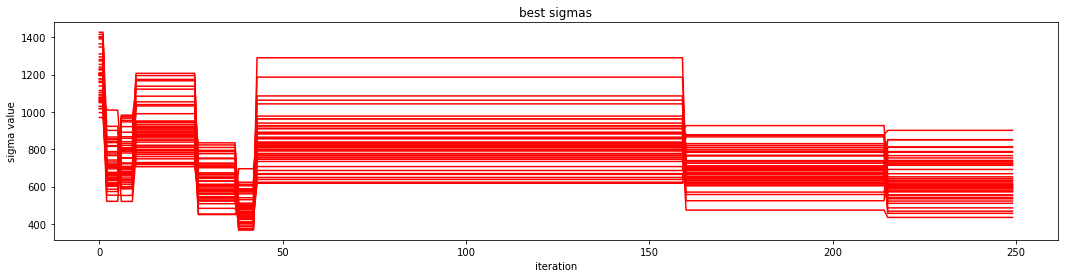

In [101]:
#moze zwiekszyc sigmy do 1000, troche bez sensu bo dziedzina to [-500,500]
d = 50
N = 4000
T = 250

best_objective_value, best_chromosome, history_objective_values, history_best_chromosome, history_best_sigmas = es(
    objective_function_F7, d, N, T, 2*N, 2, 1000.0, 1/np.sqrt(2*d), 1/np.sqrt(2*np.sqrt(d)), 10, check_range = True, domain = (-500, 500))

plt.figure(figsize=(18, 4))
plt.plot(history_objective_values[:, 0], 'r-')
plt.plot(history_objective_values[:, 1], 'r-')
plt.plot(history_objective_values[:, 2], 'r-')
plt.xlabel('iteration')
plt.ylabel('objective function value')
plt.title('min/avg/max objective function values')
plt.show()

plt.figure(figsize=(18, 4))
plt.plot(history_best_sigmas, 'r-')
plt.xlabel('iteration')
plt.ylabel('sigma value')
plt.title('best sigmas')
plt.show()

Iteration 0000 : best score = -35147.39995897, mean score = -40273.85570068.
Iteration 0010 : best score = -33698.16255052, mean score = -37721.47236705.
Iteration 0020 : best score = -33309.02546682, mean score = -36942.28211005.
Iteration 0030 : best score = -32952.38786319, mean score = -36526.49009406.
Iteration 0040 : best score = -32952.38786319, mean score = -36243.64387185.
Iteration 0050 : best score = -32952.38786319, mean score = -36027.57283086.
Iteration 0060 : best score = -32952.38786319, mean score = -35861.96055848.
Iteration 0070 : best score = -32583.10125668, mean score = -35721.94919565.
Iteration 0080 : best score = -32583.10125668, mean score = -35611.05403068.
Iteration 0090 : best score = -32163.82327727, mean score = -35511.24049322.
Iteration 0100 : best score = -32163.82327727, mean score = -35428.92921303.
Iteration 0110 : best score = -32163.82327727, mean score = -35355.39709212.
Iteration 0120 : best score = -32163.82327727, mean score = -35288.27192341.

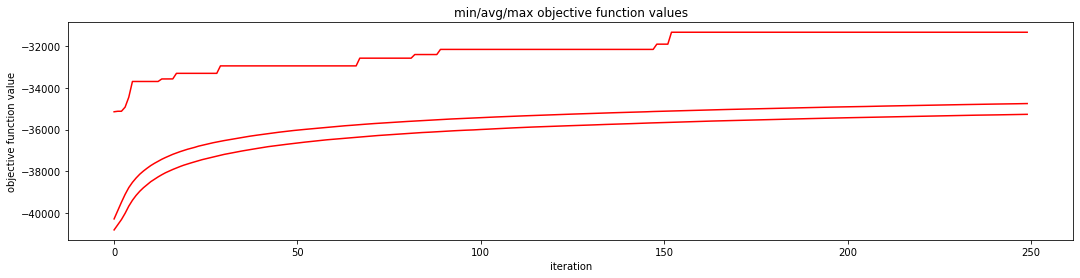

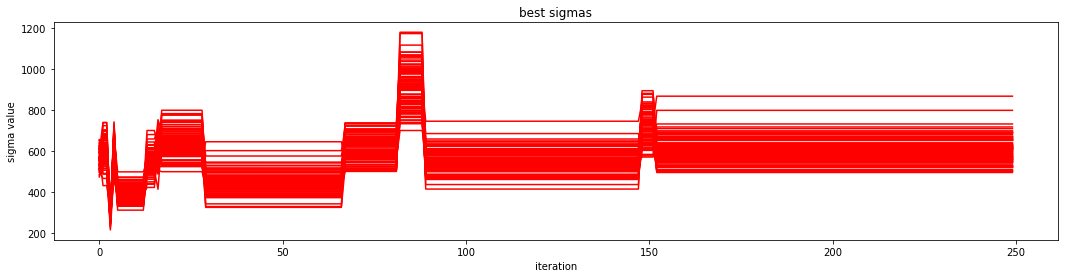

In [100]:
d = 100
N = 5000
T = 250

best_objective_value, best_chromosome, history_objective_values, history_best_chromosome, history_best_sigmas = es(
    objective_function_F7, d, N, T, 2*N, 2, 500.0, 1/np.sqrt(2*d), 1/np.sqrt(2*np.sqrt(d)), 10, check_range = True, domain = (-500, 500))

plt.figure(figsize=(18, 4))
plt.plot(history_objective_values[:, 0], 'r-')
plt.plot(history_objective_values[:, 1], 'r-')
plt.plot(history_objective_values[:, 2], 'r-')
plt.xlabel('iteration')
plt.ylabel('objective function value')
plt.title('min/avg/max objective function values')
plt.show()

plt.figure(figsize=(18, 4))
plt.plot(history_best_sigmas, 'r-')
plt.xlabel('iteration')
plt.ylabel('sigma value')
plt.title('best sigmas')
plt.show()